# <데이터 분석 프로젝트 보고서>
<hr>

## 1. 프로젝트 개요
- 프로젝트 명 : 범죄 발생에 대한 대처와 해결방안
- 프로젝트 목적 : 제일 많이 일어나는 범죄에 대한 해결방안 찾아보기
- 프로젝트 진행 배경 : 최근 뉴스에서 여러범죄(음주운전, 대전교사, 부산 돌려차기 등)에 대해 자주 언급이 되면서 점점 늘어가는 여러 범죄 중 어느범죄가 제일 높은지 알아내서 해결방안을 탐색해 보는 것입니다.  
<hr>

## 2. 결론
- 자주 일어나는 범죄는 교통범죄가 많이 일어나고 지역은 서울과 경기 장소는 노상(길거리)이며 시간대는 저녁 9시에서 12까지 요일은 금요일 범죄 발생시 인지할수있는 기간은 1개월이내 범죄는 주로 남성이 일으키며 범죄 발생율이 높은곳은 서울이 아닌 제주가 높다는것을 알수있습니다.
- 이 정보를 바탕으로 금요일 저녁 9시부터는 경찰관들이 순찰을 자주 다녀야합니다. 특히 교통범죄가 많이 일어나기 때문에 교통순찰의 강화와 노상(길거리)위주로 순찰을 다녀야 합니다. 그리고 제주가 범죄 발생율이 높기 때문에 제주도 순찰을 강화해야 합니다.   
<hr> 

## 3. 문제 정의
- 문제 정의 시 기준을 명확히 할것
    1. 제일 많이 일어나는 범죄가 무엇인가?
    2. 범죄가 많이 일어나는 지역, 장소, 시간대 및 요일은 무엇인가?
    3. 범죄 발생후 인지하는데 걸리는 기간은 언제까지인가?
    4. 전국적으로 범죄 발생과 검거 현황은 어떻게 되는가?
    5. 지역별 인구에 따른 범죄 발생율은 어느 지역이 높은가?
<hr> 

### -  필요한 모듈 설치 및 준비하기

In [1]:
# 데이터 프레임 이미지로 만들기
# !pip install dataframe_image

In [2]:
# 날짜 모듈
import datetime

# 결측값 확인
import missingno as msno

# 그래프 그릴때 필요한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 글자 출력 오류 해결 
import matplotlib
import matplotlib.font_manager as fm

font_location = 'c:/windows/fonts/H2GTRE.TTF'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family = font_name)

import warnings as wa
# 오류 메세지 차단
wa.filterwarnings("ignore")

# pandas, numpy 모듈
import pandas as pd
import numpy as np

# 데이터 프레임 이미지로 변환 모듈
import dataframe_image as dfi

## 4. 데이터 수집
- 수집 사이트 
    1. 공공데이터포털 : https://www.data.go.kr/ 
    2. 주민등록 인구통계 행정안전부 : https://jumin.mois.go.kr/
- 수집 데이터 정의
    - 경찰청_범죄 발생 지역별 통계_20151231(공공데이터포털)
    - 경찰청_범죄 발생 장소별 통계_20221231(공공데이터포털)
    - 경찰청_범죄 발생 시간대 및 요일_20191231(공공데이터포털)
    - 경찰청_범죄 발생부터 인지까지의 기간_20211231(공공데이터포털)
    - 경찰청_전국 범죄 발생 및 검거 현황_20211231(공공데이터포털)
    - 202309_202309_주민등록인구및세대현황_월간(주민등록 인구통계 행정안전부)
<hr> 

In [3]:
data = pd.read_csv('data/crime/경찰청_범죄 발생 지역별 통계_20151231.csv', encoding='cp949')

data

,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,강력범죄,살인기수,67,20,13,17,11,8,12,2,...,1,0,2,4,7,2,0,11,7,30
1,강력범죄,살인미수등,96,41,23,34,7,16,11,1,...,5,5,6,0,13,2,1,16,4,44
2,강력범죄,강도,274,161,60,103,44,64,29,0,...,1,4,2,13,26,3,4,29,4,65
3,강력범죄,강간,969,383,216,304,216,181,132,3,...,10,12,35,63,85,11,14,64,18,328
4,강력범죄,유사강간,118,24,21,35,17,14,10,1,...,1,1,3,1,8,1,1,12,0,33
5,강력범죄,강제추행,4282,991,645,924,495,362,293,34,...,20,22,59,58,172,36,32,165,28,764
6,강력범죄,기타강간강제추행등,94,37,20,31,22,12,9,0,...,1,2,1,4,13,3,1,11,2,55
7,강력범죄,방화,315,117,86,94,48,41,36,5,...,2,7,9,12,33,0,12,23,4,148
8,절도범죄,절도,55280,20136,12759,10679,8438,9495,5449,638,...,313,358,1205,2032,5860,602,921,3309,643,11754
9,폭력범죄,상해,7174,4675,2736,2179,1162,1516,1353,117,...,134,194,307,408,1187,321,269,532,149,3941


In [4]:
data1 = pd.read_csv('data/crime/경찰청_범죄 발생 장소별 통계_20221231.csv', encoding='cp949')
data1

,범죄대분류,범죄중분류,아파트_연립다세대,단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,...,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방,기타
0,강력범죄,살인기수,114,60,0,28,0,0,1,0,...,1,3,3,0,0,0,5,0,0,17
1,강력범죄,살인미수등,123,85,0,105,0,1,0,1,...,1,3,0,0,0,0,5,2,1,33
2,강력범죄,강도,62,46,0,141,0,12,32,1,...,0,3,0,0,1,0,21,1,4,30
3,강력범죄,강간,1616,880,0,158,0,2,3,0,...,7,9,0,1,0,1,45,48,3,560
4,강력범죄,유사강간,240,147,2,57,1,0,0,0,...,2,5,0,0,2,0,7,12,1,111
5,강력범죄,강제추행,1619,983,11,3098,34,86,277,11,...,45,32,2,20,8,0,114,65,37,1597
6,강력범죄,기타 강간?강제추행등,71,54,0,16,0,0,0,0,...,0,0,0,0,0,0,1,6,0,17
7,강력범죄,방화,331,274,1,207,0,5,6,1,...,2,15,4,0,0,2,32,8,3,93
8,절도범죄,절도범죄,17196,8117,115,51945,2274,11703,6994,3536,...,574,3362,46,15,4,52,10381,703,994,14665
9,폭력범죄,상해,4160,2570,35,9150,13,88,126,12,...,61,130,22,14,5,6,592,51,53,1859


In [5]:
data2 = pd.read_csv('data/crime/경찰청_범죄 발생 시간대 및 요일_20191231.csv', encoding='cp949')
data2

,범죄대분류,범죄중분류,0시00분-02시59분,03시00분-05시59분,06시00분-08시59분,09시00분-11시59분,12시00분-14시59분,15시00분-17시59분,18시00분-20시59분,21시00분-23시59분,미상,일,월,화,수,목,금,토
0,강력범죄,살인기수,15,21,20,28,38,33,43,49,50,38,45,48,40,37,49,40
1,강력범죄,살인미수등,33,50,29,44,46,60,66,82,72,71,70,68,62,73,85,53
2,강력범죄,강도,105,131,44,59,68,72,81,107,131,111,113,116,105,124,121,108
3,강력범죄,강간,630,885,417,293,325,311,425,719,1305,869,686,734,719,682,722,898
4,강력범죄,유사강간,102,110,57,62,60,55,66,89,181,145,99,109,92,89,112,136
5,강력범죄,강제추행,1855,1921,1293,1163,1300,1706,2189,2901,2792,2580,2272,2306,2358,2231,2542,2831
6,강력범죄,기타 강간 강제추행등,36,47,12,26,20,37,30,40,77,58,53,45,49,39,43,38
7,강력범죄,방화,144,151,105,124,109,173,189,228,139,209,181,181,209,170,206,206
8,절도범죄,절도,13088,14167,13094,21501,27167,28553,27229,20568,21590,25466,26239,25671,26061,26098,28156,29266
9,폭력범죄,상해,4166,3408,2247,2967,3025,3684,4585,7433,5343,5693,4908,5063,5038,5110,5270,5776


In [6]:
data3 = pd.read_csv('data/crime/경찰청_범죄 발생부터 인지까지의 기간_20211231.csv', encoding='cp949')
data3

,범죄대분류,범죄중분류,1시간이내,2시간이내,5시간이내,12시간이내,24시간이내,2일이내,5일이내,10일이내,1개월이내,3개월이내,3개월초과
0,강력범죄,살인기수,60,8,14,48,36,14,21,6,18,17,28
1,강력범죄,살인미수등,89,16,39,74,65,30,19,8,14,14,20
2,강력범죄,강도,78,15,33,69,47,47,54,34,49,40,29
3,강력범죄,강간,366,79,153,311,320,281,489,483,784,818,1179
4,강력범죄,유사강간,50,9,35,45,46,49,83,69,146,124,158
5,강력범죄,강제추행,1481,314,536,565,615,631,1528,1616,2960,1861,1855
6,강력범죄,"기타 강간,강제추행등",24,4,5,24,35,12,19,21,19,26,49
7,강력범죄,방화,177,29,73,126,86,60,93,78,147,130,47
8,절도범죄,소계,12325,2804,5050,6570,9133,9358,19032,24460,40080,28297,9300
9,폭력범죄,상해,4165,738,1055,1309,1240,1435,3435,3799,6240,3521,1516


In [7]:
data4 = pd.read_csv('data/crime/경찰청_전국 범죄 발생 및 검거 현황_20211231.csv', encoding='cp949')
data4

,범죄대분류,범죄중분류,범죄소분류,발생,검거,검거인원(남),검거인원(여),불상,법인체
0,강력범죄,살인기수,살인,204,196,187,54,4,1
1,강력범죄,살인기수,영아살해,5,5,0,5,0,0
2,강력범죄,살인기수,존속살해,26,27,24,3,0,0
3,강력범죄,살인기수,촉탁·승낙살인,2,1,5,4,0,0
4,강력범죄,살인기수,자살교사·방조,25,24,12,14,0,0
...,...,...,...,...,...,...,...,...,...
468,기타범죄,계,"허위감정,증거인멸·은닉,증인은닉죄",99,59,103,47,38,0
469,기타범죄,계,형사소송법,2,2,1,3,0,0
470,기타범죄,계,형의실효등에관한법률,8,8,11,2,1,0
471,기타범죄,계,화물자동차운수사업법,2996,2978,1285,64,2,50


In [8]:
data5 = pd.read_csv('data/crime/202309_202309_주민등록인구및세대현황_월간.csv', encoding='cp949')
data5

,행정구역,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율
0,전국,51370001,23900917,2,25592335,25777666,1
1,서울특별시,9407540,4475726,2,4552501,4855039,1
2,부산광역시,3300836,1565115,2,1609650,1691186,1
3,대구광역시,2377801,1092536,2,1168679,1209122,1
4,인천광역시,2987918,1344029,2,1494725,1493193,1
5,광주광역시,1422999,656061,2,702748,720251,1
6,대전광역시,1444595,680653,2,720520,724075,1
7,울산광역시,1104167,489298,2,567314,536853,1
8,세종특별자치시,385932,160479,2,192246,193686,1
9,경기도,13626339,5969573,2,6855626,6770713,1


## 5. 데이터 정제
- 전처리(결측치 및 이상치 처리) 과정
    - 결측값 확인 결과 결측값이 없습니다.

- 활용 데이터 정의
    - 데이터 분석에 필요한 데이터 정의 - 컬럼명 명확하게
        - 경찰청_범죄 발생 지역별 통계_20151231 - 범죄대분류, 범죄중분류, 지역명이 적힌 컬럼(서울, 대구, 대전.... 등)
        - 경찰청_범죄 발생 장소별 통계_20221231 - 범죄대분류, 장소명이 적힌 컬럼(아파트_연립다세대, 단독주택, 고속도로... 등)
        - 경찰청_범죄 발생 시간대 및 요일_20191231 - 범죄대분류, 시간과 요일이 적힌 컬럼(0시00분-02시59분..., 금... 등)
        - 경찰청_범죄 발생부터 인지까지의 기간_20211231 - 범죄대분류, 기간이 적힌 컬럼(n개월이내..., n시간이내..., n일이내 등)
        - 경찰청_전국 범죄 발생 및 검거 현황_20211231 - 범죄대분류, 발생, 검거 검거인원(남), 검거인원(여), 불상, 법인체
        - 202309_202309_주민등록인구및세대현황_월간 - 행정구역, 2023년09월_총인구수
<hr> 

### - 결측값 확인하기

In [9]:
# data.info()
# data1.info()

In [10]:
# msno.bar(data)
# msno.bar(data1)
# msno.bar(data2)
# msno.bar(data3)
# msno.bar(data4)
# msno.bar(data5)

In [11]:
# data.isna().sum()
# data1.isna().sum()

In [12]:
# data.dtypes
# data1.dtypes

In [13]:
# 모든 열을 출력한다.
pd.set_option('display.max_columns', None)

# 모든 행을 출력한다.
# pd.set_option('display.max_row', None) 

## 6. 데이터 분석 및 시각화
- 분석 소주제
    1. 제일 많이 일어나는 범죄(대분류)
    2. 제일 많이 일어나는 범죄(중분류)
    3. 범죄가 많이 일어나는 지역
    4. 범죄가 많이 일어나는 장소
    5. 범죄가 많이 일어나는 시간대 및 요일
    6. 범죄 발생으로부터 인지하는데 까지 걸리는 기간
    7. 전국 범죄 발생과 검거현황
    8. 지역별 인구수에 따른 범죄 발생율

### 1. 제일 많이 일어나는 범죄(대분류)
### - 분석 데이터

In [14]:
# 범죄대분류를 복사
data['범죄분류'] = data['범죄대분류']
data

,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,경기 고양,경기 과천,경기 광명,경기 광주,경기 구리,경기 군포,경기 김포,경기 남양주,경기 동두천,경기 부천,경기 성남,경기 수원,경기 시흥,경기 안산,경기 안성,경기 안양,경기 양주,경기 여주,경기 오산,경기 용인,경기 의왕,경기 의정부,경기 이천,경기 파주,경기 평택,경기 포천,경기 하남,경기 화성,강원 강릉,강원 동해,강원 삼척,강원 속초,강원 원주,강원 춘천,강원 태백,충북 제천,충북 청주,충북 충주,충남 계룡,충남 공주,충남 논산,충남 당진,충남 보령,충남 서산,충남 아산,충남 천안,전북 군산,전북 김제,전북 남원,전북 익산,전북 전주,전북 정읍,전남 광양,전남 나주,전남 목포,전남 순천,전남 여수,경북 경산,경북 경주,경북 구미,경북 김천,경북 문경,경북 상주,경북 안동,경북 영주,경북 영천,경북 포항,경남 거제,경남 김해,경남 마산,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외,범죄분류
0,강력범죄,살인기수,67,20,13,17,11,8,12,2,8,2,1,4,0,1,2,5,0,7,4,6,9,8,0,2,1,1,2,7,0,0,3,3,1,4,1,7,1,1,0,0,5,3,0,2,4,1,0,0,3,0,3,0,5,4,0,0,0,3,4,0,0,0,2,1,4,1,3,3,0,1,1,2,1,0,1,2,1,0,1,0,2,4,7,2,0,11,7,30,강력범죄
1,강력범죄,살인미수등,96,41,23,34,7,16,11,1,9,0,1,8,3,1,3,6,3,13,6,7,6,12,2,6,2,3,2,5,0,7,2,4,6,3,0,8,4,1,0,1,5,3,0,5,15,1,0,2,3,1,5,1,4,8,6,0,0,5,7,1,3,1,0,1,2,2,4,2,1,0,0,0,0,2,7,1,7,0,5,5,6,0,13,2,1,16,4,44,강력범죄
2,강력범죄,강도,274,161,60,103,44,64,29,0,14,0,4,4,6,5,7,12,0,25,30,38,14,42,2,7,5,5,4,11,1,15,8,5,20,3,1,12,8,0,0,0,9,9,0,2,30,6,0,0,4,3,3,6,2,22,7,1,2,14,21,0,1,0,9,9,6,14,9,13,3,1,1,0,9,5,10,4,17,0,1,4,2,13,26,3,4,29,4,65,강력범죄
3,강력범죄,강간,969,383,216,304,216,181,132,3,73,0,12,25,22,26,33,50,6,105,83,157,36,86,23,52,19,13,23,53,8,67,23,29,50,17,11,32,28,5,10,6,48,10,1,15,79,15,1,14,13,11,10,11,27,82,21,13,11,34,68,16,14,4,42,34,43,23,30,50,14,5,9,25,9,9,48,23,42,0,10,12,35,63,85,11,14,64,18,328,강력범죄
4,강력범죄,유사강간,118,24,21,35,17,14,10,1,9,0,0,3,1,2,5,2,0,12,12,21,5,2,0,4,1,0,2,9,0,10,3,3,6,1,1,4,5,1,0,2,2,9,3,2,4,5,0,1,1,0,4,7,2,6,2,0,1,3,4,1,1,1,1,5,2,2,2,6,1,2,1,2,1,0,4,2,1,0,1,1,3,1,8,1,1,12,0,33,강력범죄
5,강력범죄,강제추행,4282,991,645,924,495,362,293,34,256,20,77,49,73,67,75,132,36,291,319,425,171,242,42,180,44,17,81,209,30,157,59,89,161,47,25,133,56,32,12,20,75,71,8,26,229,55,6,27,39,32,26,48,64,177,62,17,21,59,176,24,19,5,81,72,51,54,55,81,25,12,13,36,23,14,90,62,114,1,20,22,59,58,172,36,32,165,28,764,강력범죄
6,강력범죄,기타강간강제추행등,94,37,20,31,22,12,9,0,7,0,2,2,3,0,2,9,0,7,14,23,6,6,3,4,3,2,2,7,0,6,4,2,4,3,0,2,1,1,3,2,7,7,2,3,12,0,0,1,0,1,1,2,2,10,4,3,0,2,6,1,2,1,3,3,1,1,3,4,2,1,1,4,4,0,8,1,7,0,1,2,1,4,13,3,1,11,2,55,강력범죄
7,강력범죄,방화,315,117,86,94,48,41,36,5,40,1,6,6,9,7,13,26,1,38,29,40,25,30,4,12,8,2,4,15,5,22,10,9,19,17,4,14,5,4,6,3,6,3,0,3,23,4,0,3,8,4,4,5,4,22,9,5,3,10,11,6,3,0,8,7,13,5,6,10,4,2,2,8,6,3,16,12,9,0,2,7,9,12,33,0,12,23,4,148,강력범죄
8,절도범죄,절도,55280,20136,12759,10679,8438,9495,5449,638,3287,170,1234,1072,1042,944,1082,1888,410,5048,3941,6487,1791,4154,844,2142,719,417,1164,2791,307,2304,655,1136,2160,580,575,2178,832,288,188,344,1785,1132,130,524,4691,925,53,423,634,1325,681,769,1487,3945,1470,344,276,1391,3402,565,461,46,1520,1188,1049,1174,1297,2212,506,227,322,679,245,298,2496,1395,2739,2,313,358,1205,2032,5860,602,921,3309,643,11754,절도범죄
9,폭력범죄,상해,7174,4675,2736,2179,1162,1516,1353,117,490,22,147,237,181,142,160,392,102,524,734,938,295,694,141,396,157,130,149,454,57,326,161,261,460,229,104,410,352,202,155,174,514,379,82,172,798,265,24,137,155,215,137,179,341,522,283,65,101,246,496,108,194,5,415,354,347,248,347,508,200,100,127,257,134,118,616,490,595,1,134,194,307,408,1187,321,269,532,149,3941,폭력범죄


In [15]:
# 범죄 대분류의 갯수
data.groupby(['범죄대분류']).count()

,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,경기 고양,경기 과천,경기 광명,경기 광주,경기 구리,경기 군포,경기 김포,경기 남양주,경기 동두천,경기 부천,경기 성남,경기 수원,경기 시흥,경기 안산,경기 안성,경기 안양,경기 양주,경기 여주,경기 오산,경기 용인,경기 의왕,경기 의정부,경기 이천,경기 파주,경기 평택,경기 포천,경기 하남,경기 화성,강원 강릉,강원 동해,강원 삼척,강원 속초,강원 원주,강원 춘천,강원 태백,충북 제천,충북 청주,충북 충주,충남 계룡,충남 공주,충남 논산,충남 당진,충남 보령,충남 서산,충남 아산,충남 천안,전북 군산,전북 김제,전북 남원,전북 익산,전북 전주,전북 정읍,전남 광양,전남 나주,전남 목포,전남 순천,전남 여수,경북 경산,경북 경주,경북 구미,경북 김천,경북 문경,경북 상주,경북 안동,경북 영주,경북 영천,경북 포항,경남 거제,경남 김해,경남 마산,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외,범죄분류
범죄대분류,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강력범죄,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
교통범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
기타범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
노동범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
마약범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
병역범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
보건범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
선거범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
안보범죄,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [16]:
# 범죄대분류를 기준으로 한 합계 
crime_class = data.groupby('범죄대분류').sum()
crime_class

,서울,부산,대구,인천,광주,대전,울산,세종,경기 고양,경기 과천,경기 광명,경기 광주,경기 구리,경기 군포,경기 김포,경기 남양주,경기 동두천,경기 부천,경기 성남,경기 수원,경기 시흥,경기 안산,경기 안성,경기 안양,경기 양주,경기 여주,경기 오산,경기 용인,경기 의왕,경기 의정부,경기 이천,경기 파주,경기 평택,경기 포천,경기 하남,경기 화성,강원 강릉,강원 동해,강원 삼척,강원 속초,강원 원주,강원 춘천,강원 태백,충북 제천,충북 청주,충북 충주,충남 계룡,충남 공주,충남 논산,충남 당진,충남 보령,충남 서산,충남 아산,충남 천안,전북 군산,전북 김제,전북 남원,전북 익산,전북 전주,전북 정읍,전남 광양,전남 나주,전남 목포,전남 순천,전남 여수,경북 경산,경북 경주,경북 구미,경북 김천,경북 문경,경북 상주,경북 안동,경북 영주,경북 영천,경북 포항,경남 거제,경남 김해,경남 마산,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
범죄대분류,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강력범죄,6215,1774,1084,1542,860,698,532,46,416,23,103,101,117,109,140,242,46,498,497,717,272,428,76,267,83,43,120,316,44,284,112,144,267,95,43,212,108,45,31,34,157,115,14,58,396,87,7,48,71,52,56,80,110,331,111,39,38,130,297,49,43,12,146,132,122,102,112,169,50,24,28,77,53,33,184,107,198,1,41,53,117,155,357,58,65,331,67,1467
교통범죄,74958,35841,39725,31163,23412,13556,16600,1056,11926,720,2740,3660,2151,2121,3726,4795,954,10467,8900,14715,7830,11372,2490,5909,2547,1687,2009,7716,1722,3670,2653,6218,7646,2677,2583,5902,2737,1519,1110,1436,6012,5008,594,1839,8972,3902,138,1230,1182,1943,1703,1767,2296,9104,3497,997,752,3202,6444,1115,2434,276,4699,4954,5083,2464,4839,8505,2121,1005,1160,1750,1644,1346,7475,4832,8691,2,1216,2517,3759,3351,12650,2936,3581,10857,2325,43877
기타범죄,41752,19868,9766,13677,5301,4602,4881,462,3473,174,1138,1135,699,672,1205,2361,372,3804,3297,4856,1961,3293,939,1924,847,368,913,2304,305,1642,829,1355,2122,881,482,2058,899,397,739,333,1130,910,140,443,2838,697,61,393,505,1384,959,669,888,2693,1765,297,255,1142,2262,401,424,140,1471,811,2846,802,1239,1307,464,190,229,532,242,268,2130,957,2018,12,410,1040,978,933,3643,1594,1331,3130,1341,17797
노동범죄,215,190,31,28,13,14,63,0,13,0,6,13,2,4,4,6,0,21,9,28,5,26,3,34,5,1,1,5,0,5,0,5,29,2,1,15,15,0,0,5,2,2,0,1,7,1,0,0,3,2,1,2,0,11,5,0,3,1,34,2,2,0,18,16,6,6,3,13,6,0,1,6,3,0,15,14,14,0,0,1,10,0,19,43,3,6,1,45
마약범죄,1360,759,393,557,69,78,67,2,82,4,15,22,16,15,13,24,25,56,79,118,41,71,92,37,25,114,18,137,6,103,10,48,124,38,10,56,5,2,1,0,61,39,2,63,73,18,0,7,3,19,10,18,36,52,7,1,2,5,32,1,7,0,13,14,23,11,28,44,17,11,17,19,11,27,19,22,121,1,43,24,25,90,122,10,6,20,16,509
병역범죄,4591,959,800,1200,371,630,382,86,360,10,61,170,71,53,50,312,44,355,362,433,228,332,101,201,137,19,104,235,34,188,71,142,156,105,36,225,33,23,9,8,110,79,3,22,316,53,6,25,72,49,20,36,99,414,82,12,19,55,186,27,38,1,98,91,82,82,76,214,37,5,32,38,14,31,243,112,198,1,57,42,158,92,355,52,52,190,155,808
보건범죄,3941,1832,417,654,760,204,230,15,223,6,90,87,62,45,68,261,20,162,244,368,302,134,51,88,77,22,32,170,19,86,41,102,94,50,41,186,37,23,7,34,93,31,7,44,96,56,1,4,21,26,33,20,57,63,97,18,26,88,144,37,15,9,42,24,78,34,53,118,25,8,17,18,11,21,100,71,126,1,51,29,57,123,258,19,37,131,36,843
선거범죄,24,24,18,19,9,8,15,5,4,1,3,0,2,0,3,0,0,0,2,2,3,1,7,3,1,8,0,8,1,0,9,11,8,0,0,6,7,1,4,1,1,1,0,12,5,1,0,3,5,7,10,3,4,1,0,10,6,2,9,7,5,6,6,5,7,4,9,9,11,3,17,2,0,3,5,3,4,0,4,5,3,30,17,4,12,11,3,267
안보범죄,38,4,4,20,3,4,2,0,1,0,1,0,0,0,0,0,0,2,2,3,0,2,0,2,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,11,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,6


In [17]:
# 범죄대분류별 합계 계산
# axis=1 은 같은 행별로 계산하는 옵션
crime_class_sum = np.sum(crime_class.groupby('범죄대분류').sum(), axis=1) 
crime_class_sum

범죄대분류
강력범죄       25334
교통범죄      596665
기타범죄      216197
노동범죄        1145
마약범죄        6411
병역범죄       18726
보건범죄       14602
선거범죄         760
안보범죄         121
절도범죄      245853
지능범죄      316121
특별경제범죄     86329
폭력범죄      305947
풍속범죄       24491
환경범죄        2955
dtype: int64

In [18]:
# 데이터프레임 형식으로 인덱스 재설정
crime_class_g = pd.DataFrame(crime_class_sum).reset_index()

# 컬럼명 변경
# inplace = True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다는 의미
crime_class_g.rename(columns = {0:'총 합계'}, inplace = True)

# 총 합계를 기준으로 내림차순 정렬
#  ascending=False: 내림차순, True는 오름차순
crime_class_g.sort_values(by='총 합계', ascending=False, inplace = True)

crime_class_g

,범죄대분류,총 합계
1,교통범죄,596665
10,지능범죄,316121
12,폭력범죄,305947
9,절도범죄,245853
2,기타범죄,216197
11,특별경제범죄,86329
0,강력범죄,25334
13,풍속범죄,24491
5,병역범죄,18726
6,보건범죄,14602


In [19]:
dfi.export(crime_class_g, 'data/crime/분석한 데이터(표, 데이터 프레임)/범죄대분류의 총 합계.png')

In [20]:
# 전치로 행과 열 변환 후 수치 확인해보기
data_ratio = pd.DataFrame(crime_class_g).T
data_ratio

,1,10,12,9,2,11,0,13,5,6,4,14,3,7,8
범죄대분류,교통범죄,지능범죄,폭력범죄,절도범죄,기타범죄,특별경제범죄,강력범죄,풍속범죄,병역범죄,보건범죄,마약범죄,환경범죄,노동범죄,선거범죄,안보범죄
총 합계,596665,316121,305947,245853,216197,86329,25334,24491,18726,14602,6411,2955,1145,760,121


### - 분석 결과 시각화

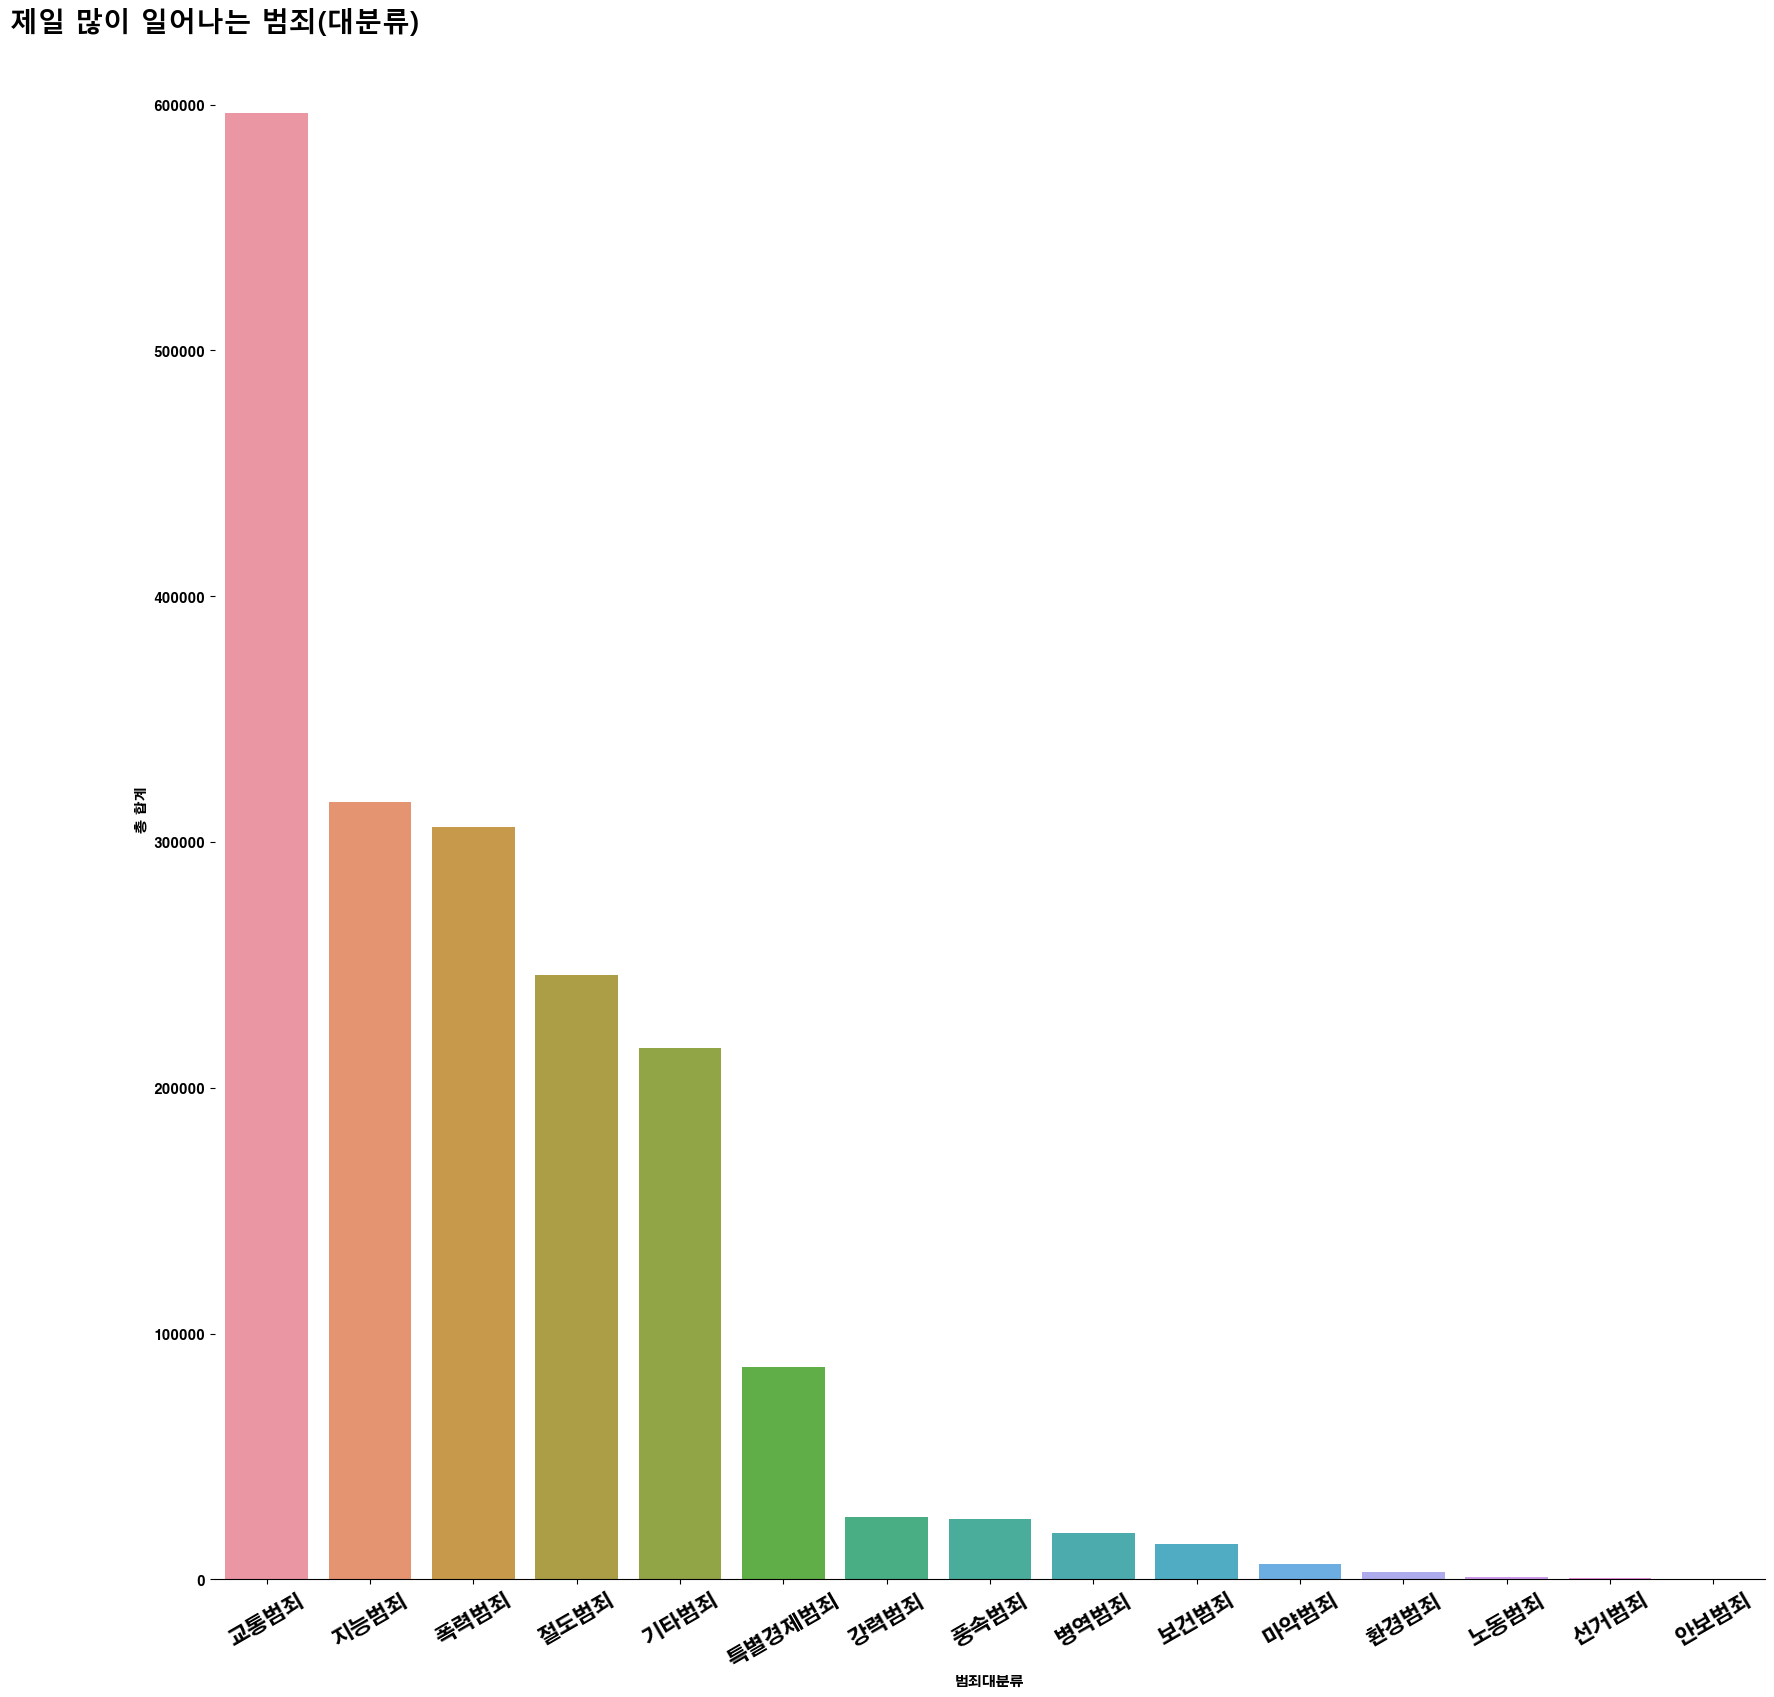

In [21]:
plt.figure(figsize=(20, 20))
sns.barplot(x='범죄대분류', y='총 합계', data=crime_class_g)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
# 한글깨짐 방지, 마이너스기호 깨짐 방지, 하얀배경에 선으로 보기편한 스타일
sns.set_theme(font ='Malgun Gothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid') 
plt.title('제일 많이 일어나는 범죄(대분류)', fontsize=20, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=30, fontsize=15)
plt.savefig('data/crime/분석 그래프/1. 제일 많이 일어나는 범죄(대분류).png')
plt.show()

### - 분석 결과
제일 많이 일어나는 1순위 범죄는 교통 범죄이며 2순위는 지능범죄, 3순위는 폭력범죄가 제일많이 일어나는 범죄 입니다.

### 2.  제일 많이 일어나는 범죄(중분류)
### - 분석 데이터

In [22]:
# 범죄중분류를 기준으로 한 합계 
crime_class_s = data.groupby('범죄중분류').sum()
crime_class_s

,서울,부산,대구,인천,광주,대전,울산,세종,경기 고양,경기 과천,경기 광명,경기 광주,경기 구리,경기 군포,경기 김포,경기 남양주,경기 동두천,경기 부천,경기 성남,경기 수원,경기 시흥,경기 안산,경기 안성,경기 안양,경기 양주,경기 여주,경기 오산,경기 용인,경기 의왕,경기 의정부,경기 이천,경기 파주,경기 평택,경기 포천,경기 하남,경기 화성,강원 강릉,강원 동해,강원 삼척,강원 속초,강원 원주,강원 춘천,강원 태백,충북 제천,충북 청주,충북 충주,충남 계룡,충남 공주,충남 논산,충남 당진,충남 보령,충남 서산,충남 아산,충남 천안,전북 군산,전북 김제,전북 남원,전북 익산,전북 전주,전북 정읍,전남 광양,전남 나주,전남 목포,전남 순천,전남 여수,경북 경산,경북 경주,경북 구미,경북 김천,경북 문경,경북 상주,경북 안동,경북 영주,경북 영천,경북 포항,경남 거제,경남 김해,경남 마산,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
범죄중분류,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강간,969,383,216,304,216,181,132,3,73,0,12,25,22,26,33,50,6,105,83,157,36,86,23,52,19,13,23,53,8,67,23,29,50,17,11,32,28,5,10,6,48,10,1,15,79,15,1,14,13,11,10,11,27,82,21,13,11,34,68,16,14,4,42,34,43,23,30,50,14,5,9,25,9,9,48,23,42,0,10,12,35,63,85,11,14,64,18,328
강도,274,161,60,103,44,64,29,0,14,0,4,4,6,5,7,12,0,25,30,38,14,42,2,7,5,5,4,11,1,15,8,5,20,3,1,12,8,0,0,0,9,9,0,2,30,6,0,0,4,3,3,6,2,22,7,1,2,14,21,0,1,0,9,9,6,14,9,13,3,1,1,0,9,5,10,4,17,0,1,4,2,13,26,3,4,29,4,65
강제추행,4282,991,645,924,495,362,293,34,256,20,77,49,73,67,75,132,36,291,319,425,171,242,42,180,44,17,81,209,30,157,59,89,161,47,25,133,56,32,12,20,75,71,8,26,229,55,6,27,39,32,26,48,64,177,62,17,21,59,176,24,19,5,81,72,51,54,55,81,25,12,13,36,23,14,90,62,114,1,20,22,59,58,172,36,32,165,28,764
공갈,634,558,263,222,118,94,79,4,34,1,19,17,17,5,10,21,9,82,47,89,33,49,17,37,11,4,14,47,3,26,5,15,26,7,12,24,18,4,2,4,27,7,1,6,36,10,0,9,10,5,7,13,18,23,16,7,5,25,57,1,10,1,20,12,19,18,18,23,4,1,7,15,8,25,26,9,25,0,9,0,16,19,87,11,8,37,26,178
교통범죄,74958,35841,39725,31163,23412,13556,16600,1056,11926,720,2740,3660,2151,2121,3726,4795,954,10467,8900,14715,7830,11372,2490,5909,2547,1687,2009,7716,1722,3670,2653,6218,7646,2677,2583,5902,2737,1519,1110,1436,6012,5008,594,1839,8972,3902,138,1230,1182,1943,1703,1767,2296,9104,3497,997,752,3202,6444,1115,2434,276,4699,4954,5083,2464,4839,8505,2121,1005,1160,1750,1644,1346,7475,4832,8691,2,1216,2517,3759,3351,12650,2936,3581,10857,2325,43877
기타강간강제추행등,94,37,20,31,22,12,9,0,7,0,2,2,3,0,2,9,0,7,14,23,6,6,3,4,3,2,2,7,0,6,4,2,4,3,0,2,1,1,3,2,7,7,2,3,12,0,0,1,0,1,1,2,2,10,4,3,0,2,6,1,2,1,3,3,1,1,3,4,2,1,1,4,4,0,8,1,7,0,1,2,1,4,13,3,1,11,2,55
기타범죄,41752,19868,9766,13677,5301,4602,4881,462,3473,174,1138,1135,699,672,1205,2361,372,3804,3297,4856,1961,3293,939,1924,847,368,913,2304,305,1642,829,1355,2122,881,482,2058,899,397,739,333,1130,910,140,443,2838,697,61,393,505,1384,959,669,888,2693,1765,297,255,1142,2262,401,424,140,1471,811,2846,802,1239,1307,464,190,229,532,242,268,2130,957,2018,12,410,1040,978,933,3643,1594,1331,3130,1341,17797
노동범죄,215,190,31,28,13,14,63,0,13,0,6,13,2,4,4,6,0,21,9,28,5,26,3,34,5,1,1,5,0,5,0,5,29,2,1,15,15,0,0,5,2,2,0,1,7,1,0,0,3,2,1,2,0,11,5,0,3,1,34,2,2,0,18,16,6,6,3,13,6,0,1,6,3,0,15,14,14,0,0,1,10,0,19,43,3,6,1,45
도박범죄,1320,921,485,390,216,251,146,7,108,1,34,42,22,33,52,53,13,115,115,343,89,131,17,69,25,16,13,63,14,39,28,34,52,19,50,53,19,8,12,18,48,24,4,22,154,33,6,13,29,45,17,38,46,105,53,23,20,51,92,20,29,0,59,78,49,36,57,66,26,9,11,25,19,12,124,113,56,0,16,10,24,27,124,89,38,106,46,744


In [23]:
# axis=1 은 같은 행별로 계산하는 옵션
crime_class_s_sum = np.sum(crime_class_s.groupby('범죄중분류').sum(), axis=1) 
crime_class_s_sum

범죄중분류
강간             5151
강도             1446
강제추행          15059
공갈             3596
교통범죄         596665
기타강간강제추행등       558
기타범죄         216197
노동범죄           1145
도박범죄           8272
마약범죄           6411
문서인장          14546
방화             1673
배임             4289
병역범죄          18726
보건범죄          14602
사기           247293
살인기수            365
살인미수등           564
상해            48005
선거범죄            760
성풍속범죄         16219
손괴            58977
안보범죄            121
약취유인            190
유가증권인지          282
유사강간            518
절도           245853
증수뢰             247
직권남용            401
직무유기            507
체포감금           1028
통화             1822
특별경제범죄        86329
폭력행위등         35686
폭행           149278
협박             9187
환경범죄           2955
횡령            46734
dtype: int64

In [24]:
# 데이터프레임 형식으로 인덱스 재설정
# reset_index(): 기존 행 인덱스를 제거하고 인덱스를 데이터 열 추가
crime_class_s_g = pd.DataFrame(crime_class_s_sum).reset_index()

# 컬럼명 변경
# inplace = True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다는 의미
crime_class_s_g.rename(columns = {0:'총 합계'}, inplace = True)

# 총 합계를 기준으로 내림차순 정렬
#  ascending=False: 내림차순, True는 오름차순
crime_class_s_g.sort_values(by='총 합계', ascending=False, inplace = True)

crime_class_s_g

,범죄중분류,총 합계
4,교통범죄,596665
15,사기,247293
26,절도,245853
6,기타범죄,216197
34,폭행,149278
32,특별경제범죄,86329
21,손괴,58977
18,상해,48005
37,횡령,46734
33,폭력행위등,35686


In [84]:
dfi.export(crime_class_s_g, 'data/crime/분석한 데이터(표, 데이터 프레임)/범죄중분류의 총 합계.png')

### - 분석 결과 시각화

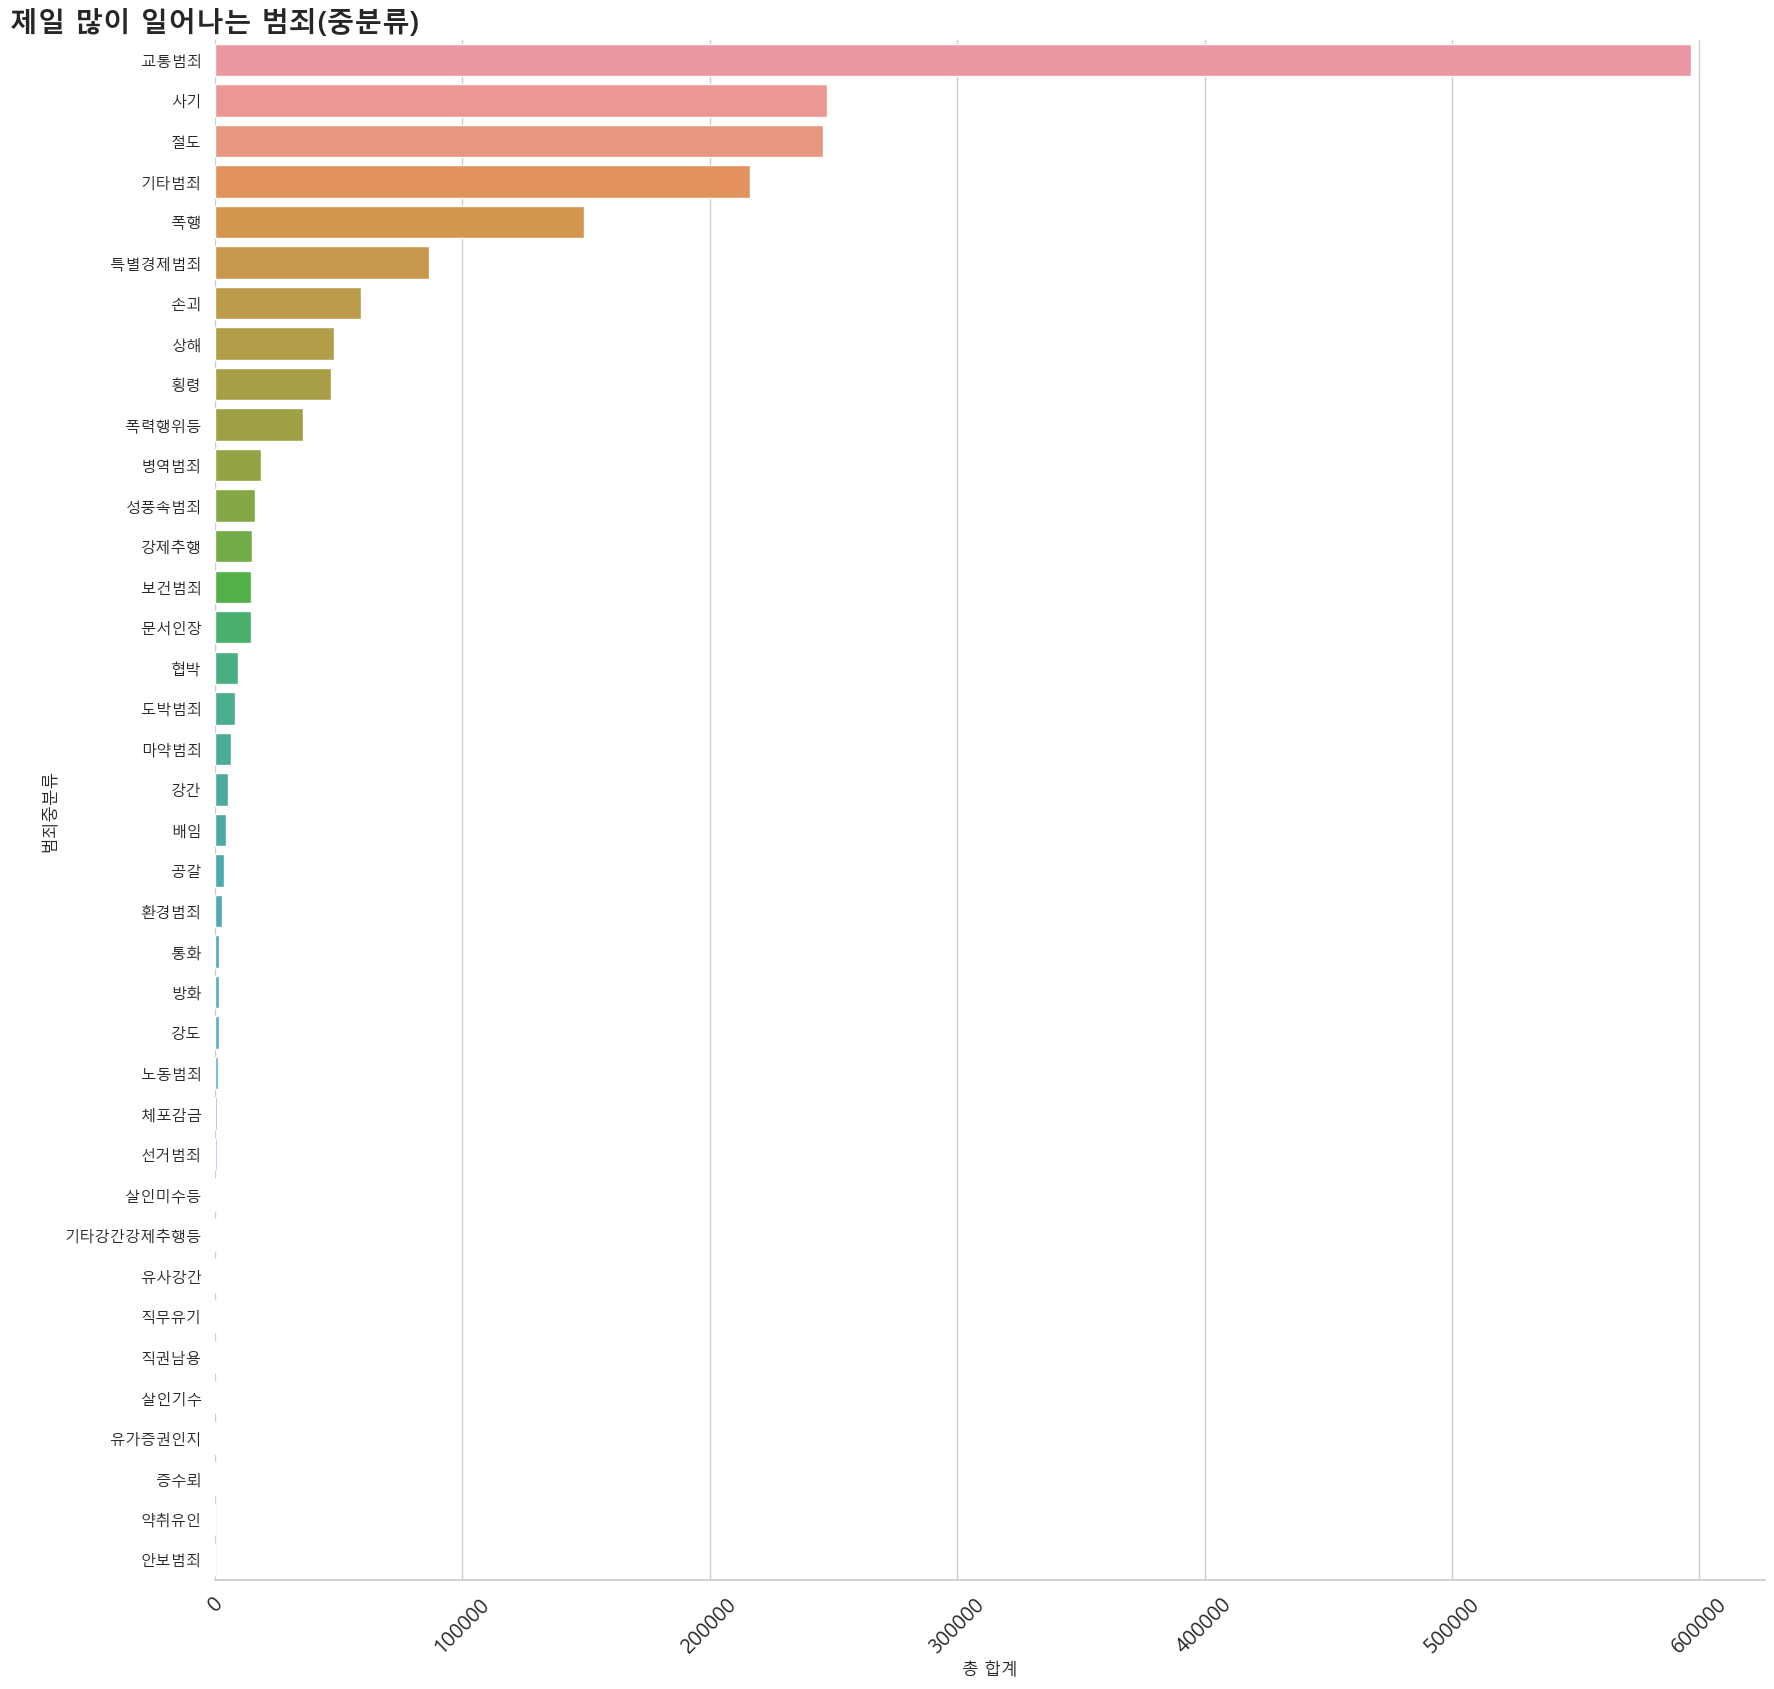

In [25]:
plt.figure(figsize=(20, 20))
sns.barplot(x='총 합계', y='범죄중분류', data=crime_class_s_g)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
# 한글깨짐 방지, 마이너스기호 깨짐 방지, 하얀배경에 선으로 보기편한 스타일
sns.set_theme(font ='Malgun Gothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid') 
plt.title('제일 많이 일어나는 범죄(중분류)', fontsize=20, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=45, fontsize=15)
plt.savefig('data/crime/분석 그래프/2. 제일 많이 일어나는 범죄(중분류).png')
plt.show()

### - 분석 결과
세부적으로 많이일어나는 범죄는 교통범죄가 1순위이며 다음으로는 사기와 절도, 기타범죄, 폭행이 많이 일어나는 범죄입니다.

### 3. 범죄가 많이 일어나는 지역
### - 분석 데이터

In [26]:
# 범죄 대분류의 갯수확인과 T로 행,열 위치 교체
data.groupby(['범죄대분류']).count().T

범죄대분류,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
범죄중분류,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
서울,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
부산,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
대구,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
인천,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
제주 서귀포,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
제주 제주,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
기타도시,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1
도시이외,8,1,1,1,1,1,1,1,1,1,9,1,8,2,1


In [27]:
# 범죄대분류를 기준으로 행,열 위치 교체와 지역별 합계 
crime_class_t = data.groupby('범죄대분류').sum().T
crime_class_t

범죄대분류,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
서울,6215,74958,41752,215,1360,4591,3941,24,38,55280,72851,22075,65247,6741,53
부산,1774,35841,19868,190,759,959,1832,24,4,20136,25247,13868,20928,2085,198
대구,1084,39725,9766,31,393,800,417,18,4,12759,14195,3421,14708,1418,19
인천,1542,31163,13677,28,557,1200,654,19,20,10679,16938,5751,18054,1580,69
광주,860,23412,5301,13,69,371,760,9,3,8438,9724,2535,9602,592,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
경남 통영,58,2936,1594,43,10,52,19,4,0,602,704,111,1006,101,21
제주 서귀포,65,3581,1331,3,6,52,37,12,0,921,988,269,1382,65,24
제주 제주,331,10857,3130,6,20,190,131,11,0,3309,3403,982,4136,342,22
기타도시,67,2325,1341,1,16,155,36,3,1,643,2495,1631,825,119,30


In [28]:
# 기존에 있는 범죄 대분류의 행의 값을 새로운 열로 생성
crime_class_t = crime_class_t.reset_index()

# 컬럼명 변경
# inplace = True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다는 의미
crime_class_t.rename(columns = {'index' : '세부지역'}, inplace = True)

crime_class_t

범죄대분류,세부지역,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
0,서울,6215,74958,41752,215,1360,4591,3941,24,38,55280,72851,22075,65247,6741,53
1,부산,1774,35841,19868,190,759,959,1832,24,4,20136,25247,13868,20928,2085,198
2,대구,1084,39725,9766,31,393,800,417,18,4,12759,14195,3421,14708,1418,19
3,인천,1542,31163,13677,28,557,1200,654,19,20,10679,16938,5751,18054,1580,69
4,광주,860,23412,5301,13,69,371,760,9,3,8438,9724,2535,9602,592,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,경남 통영,58,2936,1594,43,10,52,19,4,0,602,704,111,1006,101,21
84,제주 서귀포,65,3581,1331,3,6,52,37,12,0,921,988,269,1382,65,24
85,제주 제주,331,10857,3130,6,20,190,131,11,0,3309,3403,982,4136,342,22
86,기타도시,67,2325,1341,1,16,155,36,3,1,643,2495,1631,825,119,30


In [29]:
# 지역 별로 구분 해보기
def region(region_g):
    if '서울' in region_g:
        return '서울'
    elif '부산' in region_g:
        return '부산'
    elif '대구' in region_g:
        return '대구'
    elif '인천' in region_g:
        return '인천'
    elif '광주' in region_g:
        return '광주'
    elif '대전' in region_g:
        return '대전'
    elif '울산' in region_g:
        return '울산'
    elif '세종' in region_g:
        return '세종'
    elif '경기' in region_g:
        return '경기'
    elif '강원' in region_g:
        return '강원'
    elif '충북' in region_g:
        return '충북'
    elif '충남' in region_g:
        return '충남'
    elif '전북' in region_g:
        return '전북'
    elif '전남' in region_g:
        return '전남'
    elif '경북' in region_g:
        return '경북'
    elif '경남' in region_g:
        return '경남'
    elif '제주' in region_g:
        return '제주'
    elif '기타도시' in region_g:
        return '기타도시'
    elif '도시이외' in region_g:
        return '도시이외'

crime_class_t['지역'] = crime_class_t['세부지역'].apply(region)
crime_class_t

범죄대분류,세부지역,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄,지역
0,서울,6215,74958,41752,215,1360,4591,3941,24,38,55280,72851,22075,65247,6741,53,서울
1,부산,1774,35841,19868,190,759,959,1832,24,4,20136,25247,13868,20928,2085,198,부산
2,대구,1084,39725,9766,31,393,800,417,18,4,12759,14195,3421,14708,1418,19,대구
3,인천,1542,31163,13677,28,557,1200,654,19,20,10679,16938,5751,18054,1580,69,인천
4,광주,860,23412,5301,13,69,371,760,9,3,8438,9724,2535,9602,592,8,광주
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,경남 통영,58,2936,1594,43,10,52,19,4,0,602,704,111,1006,101,21,경남
84,제주 서귀포,65,3581,1331,3,6,52,37,12,0,921,988,269,1382,65,24,제주
85,제주 제주,331,10857,3130,6,20,190,131,11,0,3309,3403,982,4136,342,22,제주
86,기타도시,67,2325,1341,1,16,155,36,3,1,643,2495,1631,825,119,30,기타도시


In [30]:
# 어느지역이 범죄가 제일 많이 발생하는지 알아보기
# axis=1 은 같은 행별로 계산하는 옵션
crime_class_t_sum = np.sum(crime_class_t.groupby('지역').sum(), axis=1) 
crime_class_t_sum

지역
강원       44178
경기      409974
경남      107025
경북       77609
광주       71919
기타도시      9688
대구       98758
대전       49577
도시이외    115794
부산      143713
서울      355341
세종        3660
울산       45141
인천      101931
전남       43039
전북       49558
제주       35606
충남       58416
충북       40730
dtype: int64

In [31]:
# 데이터프레임 형식으로 인덱스 재설정
# reset_index(): 기존 행 인덱스를 제거하고 인덱스를 데이터 열 추가
# 지역이라는 인덱스를 열로 변환
crime_class_t_g = pd.DataFrame(crime_class_t_sum).reset_index()

# 컬럼명 변경
# inplace = True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다는 의미
crime_class_t_g.rename(columns = {0:'총 합계'}, inplace = True)

# 총 합계를 기준으로 내림차순 정렬
#  ascending=False: 내림차순, True는 오름차순
crime_class_t_g.sort_values(by='총 합계', ascending=False, inplace = True)

crime_class_t_g

,지역,총 합계
1,경기,409974
10,서울,355341
9,부산,143713
8,도시이외,115794
2,경남,107025
13,인천,101931
6,대구,98758
3,경북,77609
4,광주,71919
17,충남,58416


In [85]:
dfi.export(crime_class_t_g, 'data/crime/분석한 데이터(표, 데이터 프레임)/범죄가 많이 일어나는 지역의 총 합계.png')

### - 분석 결과 시각화

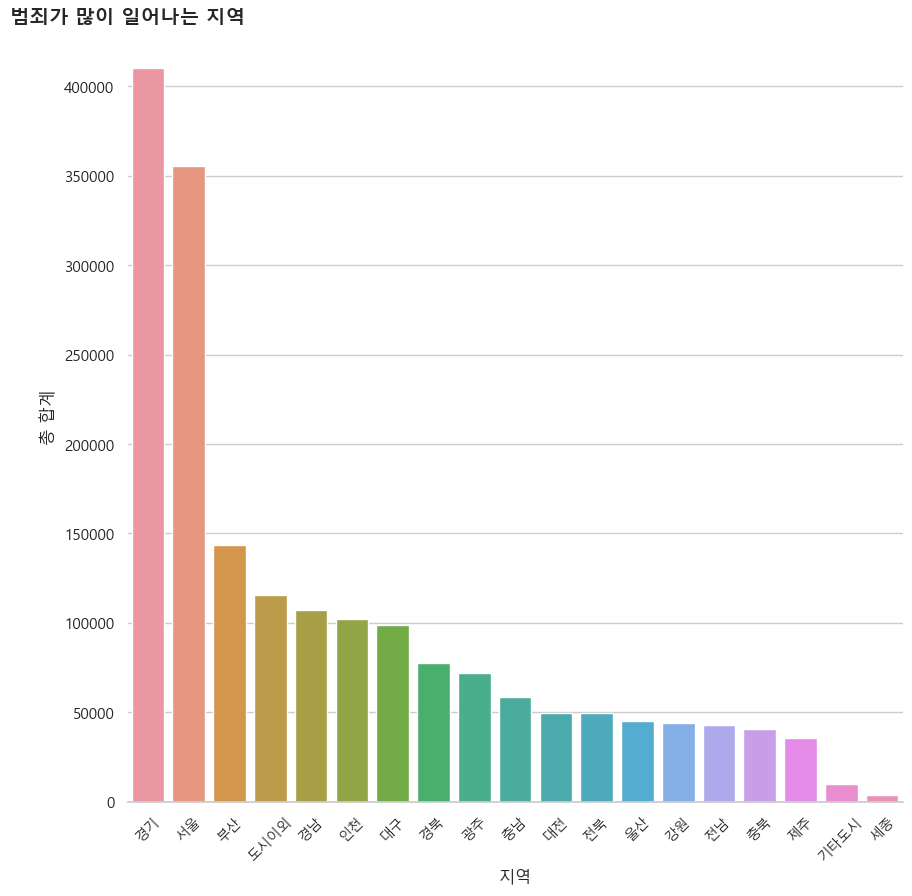

In [32]:
plt.figure(figsize=(10, 10))
sns.barplot(x='지역', y='총 합계', data=crime_class_t_g)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
# 한글깨짐 방지, 마이너스기호 깨짐 방지, 하얀배경에 선으로 보기편한 스타일
sns.set_theme(font ='Malgun Gothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid') 
plt.title('범죄가 많이 일어나는 지역', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=45, fontsize=10)
plt.savefig('data/crime/분석 그래프/3. 범죄가 많이 일어나는 지역.png')
plt.show()

### - 분석 결과
범죄가 많이 일어나는 지역은 경기와 서울이며 그 다음은 부산이 제일많이 일어납니다.

### 4. 범죄가 많이 일어나는 장소
### - 분석 데이터

In [33]:
# 범죄대분류를 기준으로 행,열 위치 교체와 지역별 합계 
crime_class_t1 = data1.groupby('범죄대분류').sum().T
crime_class_t1

범죄대분류,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
아파트_연립다세대,4176,106,25525,2,1209,317,958,79,3,17196,12124,1407,41558,3629,12
단독주택,2529,37,16484,1,1938,411,423,76,7,8117,13091,943,23092,2574,19
고속도로,14,7471,1195,1,6,0,2,0,1,115,999,23,395,9,2
노상,3810,230183,48616,26,1880,212,1337,999,30,51945,68716,4222,86637,2294,628
백화점,35,0,96,0,0,0,0,0,0,2274,400,40,181,21,0
슈퍼마켓,106,2,569,0,2,0,33,2,0,11703,1167,337,768,49,0
편의점,319,3,2150,3,20,0,54,1,1,6994,3312,1331,2167,80,0
대형할인매장,14,0,82,0,0,0,1,1,0,3536,286,52,148,17,1
상점,480,48,2849,5,70,21,851,7,1,17550,7725,2166,3530,257,33
시장_노점,210,53,1400,2,31,3,419,19,0,3927,1950,810,2366,157,8


In [34]:
# 기존에 있는 범죄 대분류의 행의 값을 새로운 열로 생성
crime_class_t1 = crime_class_t1.reset_index()

# 컬럼명 변경
# inplace = True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다는 의미
crime_class_t1.rename(columns = {'index' : '장소'}, inplace = True)

crime_class_t1

범죄대분류,장소,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
0,아파트_연립다세대,4176,106,25525,2,1209,317,958,79,3,17196,12124,1407,41558,3629,12
1,단독주택,2529,37,16484,1,1938,411,423,76,7,8117,13091,943,23092,2574,19
2,고속도로,14,7471,1195,1,6,0,2,0,1,115,999,23,395,9,2
3,노상,3810,230183,48616,26,1880,212,1337,999,30,51945,68716,4222,86637,2294,628
4,백화점,35,0,96,0,0,0,0,0,0,2274,400,40,181,21,0
5,슈퍼마켓,106,2,569,0,2,0,33,2,0,11703,1167,337,768,49,0
6,편의점,319,3,2150,3,20,0,54,1,1,6994,3312,1331,2167,80,0
7,대형할인매장,14,0,82,0,0,0,1,1,0,3536,286,52,148,17,1
8,상점,480,48,2849,5,70,21,851,7,1,17550,7725,2166,3530,257,33
9,시장_노점,210,53,1400,2,31,3,419,19,0,3927,1950,810,2366,157,8


In [35]:
# 어느장소에 범죄가 제일 많이 발생하는지 알아보기
# axis=1 은 같은 행별로 계산하는 옵션
crime_class_t1_sum = np.sum(crime_class_t1.groupby('장소').sum(), axis=1) 
crime_class_t1_sum.sort_values(ascending=False, inplace = True) # 높은순으로 정렬
crime_class_t1_sum

장소
노상           501535
기타           393258
아파트_연립다세대    108301
유흥접객업소        79990
사무실           74327
단독주택          69742
상점            35593
주차장           27321
해상            21215
숙박업소_목욕탕      17055
편의점           16435
기타교통수단내       15778
슈퍼마켓          14738
시장_노점         11355
역_대합실         10367
고속도로          10233
산야             9127
의료기관           8782
유원지            6521
학교             6306
공장             6305
금융기관           5977
공사장_광산         5813
대형할인매장         4138
창고             3614
지하철            3589
피씨방            3585
공중화장실          3528
백화점            3047
종교기관           1828
흥행장            1657
부대             1026
공지              218
구금장소            129
dtype: int64

In [36]:
# 데이터프레임 형식으로 인덱스 재설정
# reset_index(): 기존 행 인덱스를 제거하고 인덱스를 데이터 열 추가
# 장소라는 인덱스를 열로 변환
crime_class_t1_g = pd.DataFrame(crime_class_t1_sum).reset_index()

# 컬럼명 변경
# inplace = True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다는 의미
crime_class_t1_g.rename(columns = {0:'총 합계'}, inplace = True)

# 총 합계를 기준으로 내림차순 정렬
#  ascending=False: 내림차순, True는 오름차순
crime_class_t1_g.sort_values(by='총 합계', ascending=False, inplace = True)

crime_class_t1_g

,장소,총 합계
0,노상,501535
1,기타,393258
2,아파트_연립다세대,108301
3,유흥접객업소,79990
4,사무실,74327
5,단독주택,69742
6,상점,35593
7,주차장,27321
8,해상,21215
9,숙박업소_목욕탕,17055


In [86]:
dfi.export(crime_class_t1_g, 'data/crime/분석한 데이터(표, 데이터 프레임)/범죄가 많이 일어나는 장소의 총 합계.png')

In [37]:
# crime_class_t1_g.T
len(crime_class_t1_g) #행의 갯수

34

### - 분석 결과 시각화

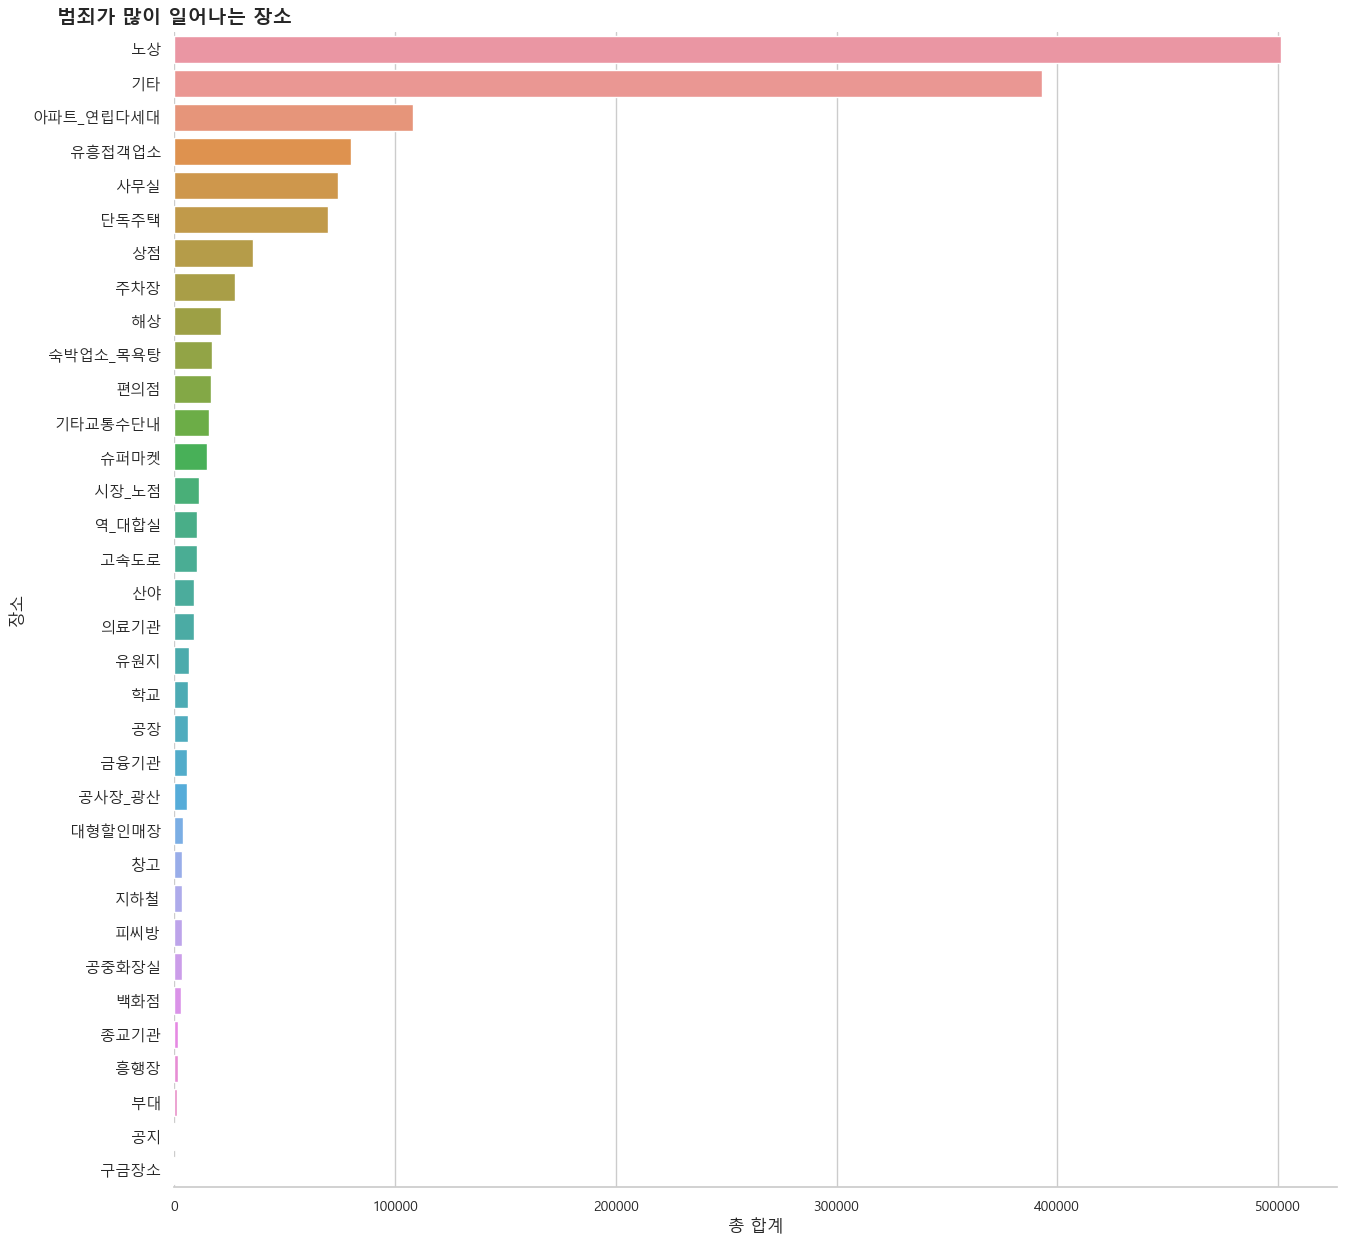

In [38]:
plt.figure(figsize=(15, 15))
sns.barplot(x='총 합계', y='장소', data=crime_class_t1_g)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
# 한글깨짐 방지, 마이너스기호 깨짐 방지, 하얀배경에 선으로 보기편한 스타일
sns.set_theme(font ='Malgun Gothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid') 
plt.title('범죄가 많이 일어나는 장소', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=0, fontsize=10)
plt.savefig('data/crime/분석 그래프/4. 범죄가 많이 일어나는 장소.png')
plt.show()

### - 분석 결과
범죄가 많이 일어나는 장소는 노상(길거리)와 기타등등 그 다음은 아파트와 유흥접객업소, 사무실,단독주택에서 많이 일어납니다.

### 5. 범죄가 많이 일어나는 시간대 및 요일
### - 분석 데이터

In [39]:
# 범죄대분류를 기준으로 행,열 위치 교체와 지역별 합계 
crime_class_t2 = data2.groupby('범죄대분류').sum().T
crime_class_t2

범죄대분류,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
0시00분-02시59분,2920,24513,10376,20,244,3,596,0,2,13088,8393,1688,31290,920,42
03시00분-05시59분,3316,23438,9184,41,214,1,404,1,0,14167,6637,1426,26880,709,53
06시00분-08시59분,1977,37189,9935,80,151,20,140,22,0,13094,5971,1333,17572,887,117
09시00분-11시59분,1799,44265,31337,124,635,1440,880,121,10,21501,49269,6702,23112,1582,458
12시00분-14시59분,1966,45675,22841,125,773,285,694,53,18,27167,38231,5340,23919,1713,290
15시00분-17시59분,2447,53506,20037,117,890,55,1009,34,10,28553,28941,4802,28939,2577,190
18시00분-20시59분,3089,58164,18200,53,776,58,893,38,3,27229,20981,3768,39618,2543,90
21시00분-23시59분,4215,70537,22421,78,674,19,1747,3,6,20568,19100,4320,57944,2750,126
미상,4747,20067,95837,337,3681,10831,6207,339,120,21590,204010,22021,38639,7472,2511
일,4081,47698,25278,85,789,111,934,65,36,25466,29037,3948,45295,2529,168


In [40]:
# 기존에 있는 범죄 대분류의 행의 값을 새로운 열로 생성
crime_class_t2 = crime_class_t2.reset_index()

# 컬럼명 변경
# inplace = True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다는 의미
crime_class_t2.rename(columns = {'index' : '시간대 및 요일'}, inplace = True)

crime_class_t2

범죄대분류,시간대 및 요일,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
0,0시00분-02시59분,2920,24513,10376,20,244,3,596,0,2,13088,8393,1688,31290,920,42
1,03시00분-05시59분,3316,23438,9184,41,214,1,404,1,0,14167,6637,1426,26880,709,53
2,06시00분-08시59분,1977,37189,9935,80,151,20,140,22,0,13094,5971,1333,17572,887,117
3,09시00분-11시59분,1799,44265,31337,124,635,1440,880,121,10,21501,49269,6702,23112,1582,458
4,12시00분-14시59분,1966,45675,22841,125,773,285,694,53,18,27167,38231,5340,23919,1713,290
5,15시00분-17시59분,2447,53506,20037,117,890,55,1009,34,10,28553,28941,4802,28939,2577,190
6,18시00분-20시59분,3089,58164,18200,53,776,58,893,38,3,27229,20981,3768,39618,2543,90
7,21시00분-23시59분,4215,70537,22421,78,674,19,1747,3,6,20568,19100,4320,57944,2750,126
8,미상,4747,20067,95837,337,3681,10831,6207,339,120,21590,204010,22021,38639,7472,2511
9,일,4081,47698,25278,85,789,111,934,65,36,25466,29037,3948,45295,2529,168


In [41]:
# 시간대만 남겨두기
crime_class_t2_2 = crime_class_t2.drop(crime_class_t2.index[8:], axis=0)
crime_class_t2_2

범죄대분류,시간대 및 요일,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
0,0시00분-02시59분,2920,24513,10376,20,244,3,596,0,2,13088,8393,1688,31290,920,42
1,03시00분-05시59분,3316,23438,9184,41,214,1,404,1,0,14167,6637,1426,26880,709,53
2,06시00분-08시59분,1977,37189,9935,80,151,20,140,22,0,13094,5971,1333,17572,887,117
3,09시00분-11시59분,1799,44265,31337,124,635,1440,880,121,10,21501,49269,6702,23112,1582,458
4,12시00분-14시59분,1966,45675,22841,125,773,285,694,53,18,27167,38231,5340,23919,1713,290
5,15시00분-17시59분,2447,53506,20037,117,890,55,1009,34,10,28553,28941,4802,28939,2577,190
6,18시00분-20시59분,3089,58164,18200,53,776,58,893,38,3,27229,20981,3768,39618,2543,90
7,21시00분-23시59분,4215,70537,22421,78,674,19,1747,3,6,20568,19100,4320,57944,2750,126


In [42]:
# 요일만 남겨두기
crime_class_t2_1 = crime_class_t2.drop(crime_class_t2.index[0:8], axis=0)
crime_class_t2_1

범죄대분류,시간대 및 요일,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
8,미상,4747,20067,95837,337,3681,10831,6207,339,120,21590,204010,22021,38639,7472,2511
9,일,4081,47698,25278,85,789,111,934,65,36,25466,29037,3948,45295,2529,168
10,월,3519,51459,39244,162,1278,3068,2051,90,25,26239,64776,8724,38034,3063,749
11,화,3607,53605,37277,139,1352,3580,2096,91,13,25671,63173,8608,38553,3130,696
12,수,3634,54509,36996,168,1219,1940,1962,100,22,26061,62642,8477,38905,3303,652
13,목,3445,54846,37250,175,1195,2082,2043,113,25,26098,63327,8432,39086,3204,653
14,금,3880,58103,37367,143,1272,1834,2085,95,24,28156,64724,8502,41198,3273,696
15,토,4310,57134,26756,103,933,97,1399,57,24,29266,33854,4709,46842,2651,263


In [43]:
# 시간대 및 요일(시간대)에 범죄가 제일 많이 발생하는지 알아보기
# axis=1 은 같은 행별로 계산하는 옵션
crime_class_t2_sum = np.sum(crime_class_t2_2.groupby('시간대 및 요일').sum(), axis=1) 
crime_class_t2_sum.sort_values(ascending=False, inplace = True) # 높은순으로 정렬
crime_class_t2_sum

시간대 및 요일
21시00분-23시59분    204508
09시00분-11시59분    183235
18시00분-20시59분    175503
15시00분-17시59분    172107
12시00분-14시59분    169090
0시00분-02시59분      94095
06시00분-08시59분     88488
03시00분-05시59분     86471
dtype: int64

In [44]:
# 데이터프레임 형식으로 인덱스 재설정
# reset_index(): 기존 행 인덱스를 제거하고 인덱스를 데이터 열 추가
# 장소라는 인덱스를 열로 변환
crime_class_t2_g = pd.DataFrame(crime_class_t2_sum).reset_index()

# 컬럼명 변경
# inplace = True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다는 의미
crime_class_t2_g.rename(columns = {'시간대 및 요일' : '시간대' , 0:'총 합계'}, inplace = True)

# 총 합계를 기준으로 내림차순 정렬
#  ascending=False: 내림차순, True는 오름차순
crime_class_t2_g.sort_values(by='총 합계', ascending=False, inplace = True)

crime_class_t2_g

,시간대,총 합계
0,21시00분-23시59분,204508
1,09시00분-11시59분,183235
2,18시00분-20시59분,175503
3,15시00분-17시59분,172107
4,12시00분-14시59분,169090
5,0시00분-02시59분,94095
6,06시00분-08시59분,88488
7,03시00분-05시59분,86471


In [87]:
dfi.export(crime_class_t2_g, 'data/crime/분석한 데이터(표, 데이터 프레임)/범죄가 많이 일어나는 시간대의 총 합계.png')

In [45]:
# 시간대 및 요일(요일)에 범죄가 제일 많이 발생하는지 알아보기
# axis=1 은 같은 행별로 계산하는 옵션
crime_class_t2_sum = np.sum(crime_class_t2_1.groupby('시간대 및 요일').sum(), axis=1) 
crime_class_t2_sum.sort_values(ascending=False, inplace = True) # 높은순으로 정렬
crime_class_t2_sum

시간대 및 요일
미상    438409
금     251352
월     242481
목     241974
화     241591
수     240590
토     208398
일     185520
dtype: int64

In [46]:
# 데이터프레임 형식으로 인덱스 재설정
# reset_index(): 기존 행 인덱스를 제거하고 인덱스를 데이터 열 추가
# 장소라는 인덱스를 열로 변환
crime_class_t2_g_1 = pd.DataFrame(crime_class_t2_sum).reset_index()

# 컬럼명 변경
# inplace = True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다는 의미
crime_class_t2_g_1.rename(columns = {'시간대 및 요일' : '요일' , 0:'총 합계'}, inplace = True)

# 총 합계를 기준으로 내림차순 정렬
#  ascending=False: 내림차순, True는 오름차순
crime_class_t2_g_1.sort_values(by='총 합계', ascending=False, inplace = True)

crime_class_t2_g_1

,요일,총 합계
0,미상,438409
1,금,251352
2,월,242481
3,목,241974
4,화,241591
5,수,240590
6,토,208398
7,일,185520


In [88]:
dfi.export(crime_class_t2_g_1, 'data/crime/분석한 데이터(표, 데이터 프레임)/범죄가 많이 일어나는 요일의 총 합계.png')

## - 분석 결과 시각화

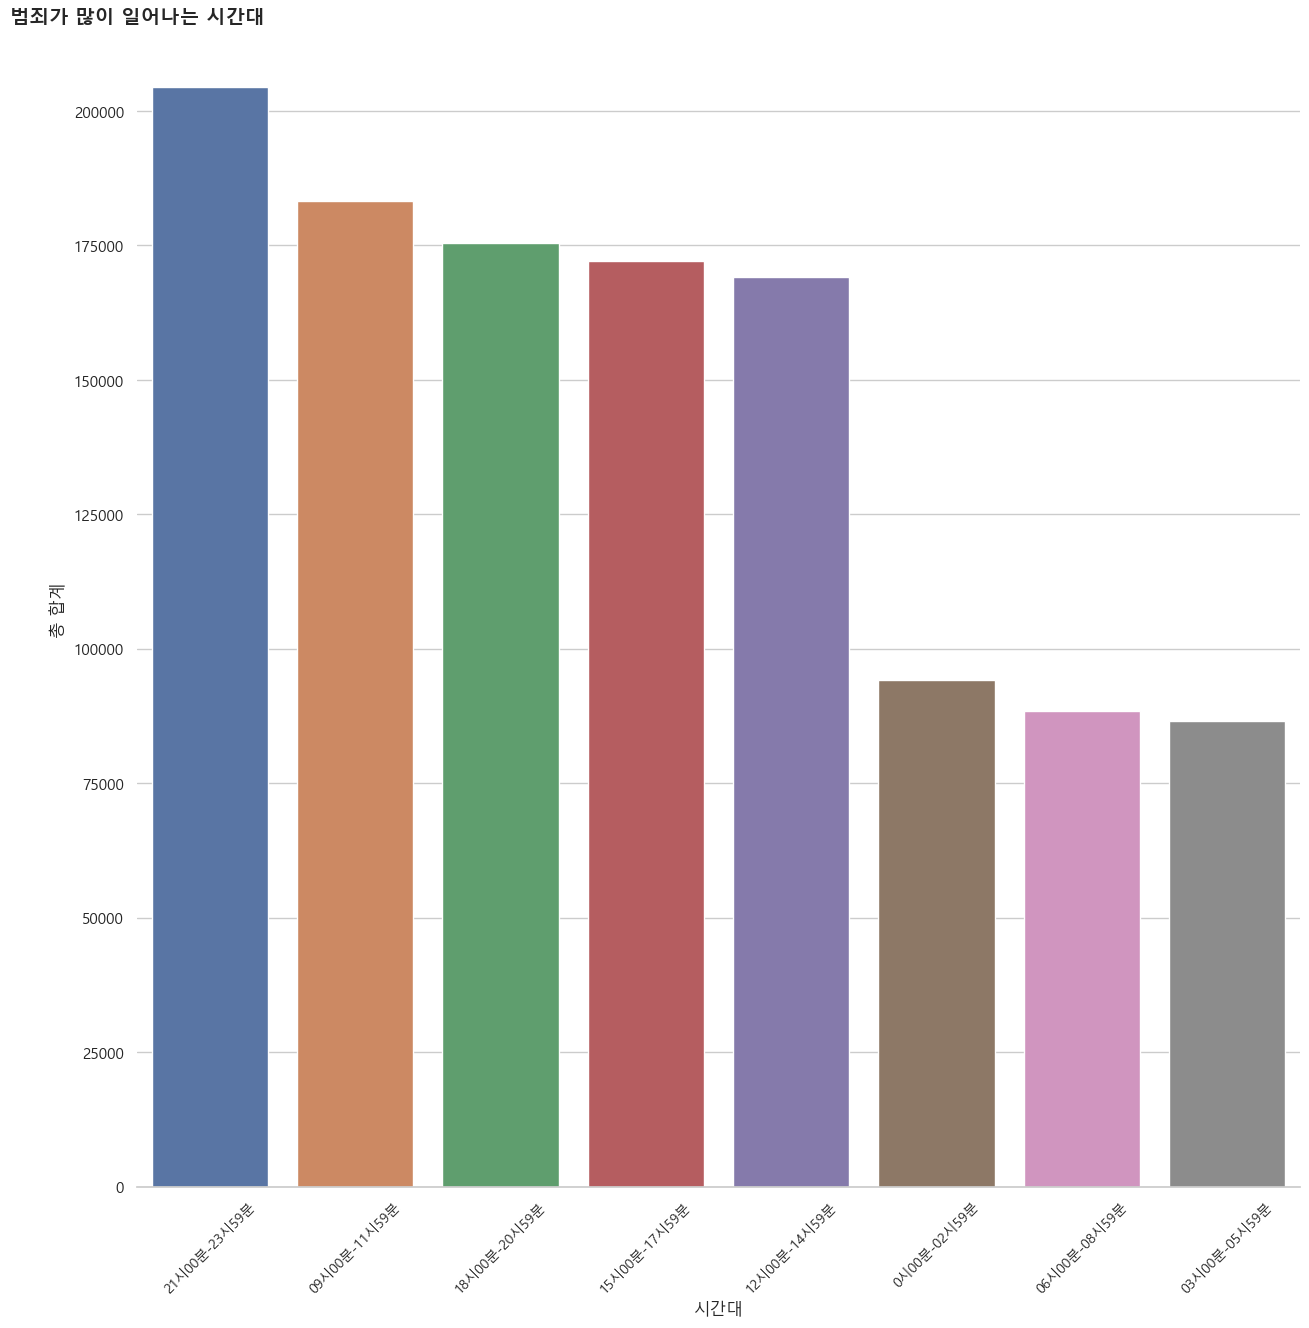

In [47]:
plt.figure(figsize=(15, 15))
sns.barplot(x='시간대', y='총 합계', data=crime_class_t2_g)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
# 한글깨짐 방지, 마이너스기호 깨짐 방지, 하얀배경에 선으로 보기편한 스타일
sns.set_theme(font ='Malgun Gothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid') 
plt.title('범죄가 많이 일어나는 시간대', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=45, fontsize=10)
plt.savefig('data/crime/분석 그래프/5_1. 범죄가 많이 일어나는 시간대(바그래프).png')
plt.show()

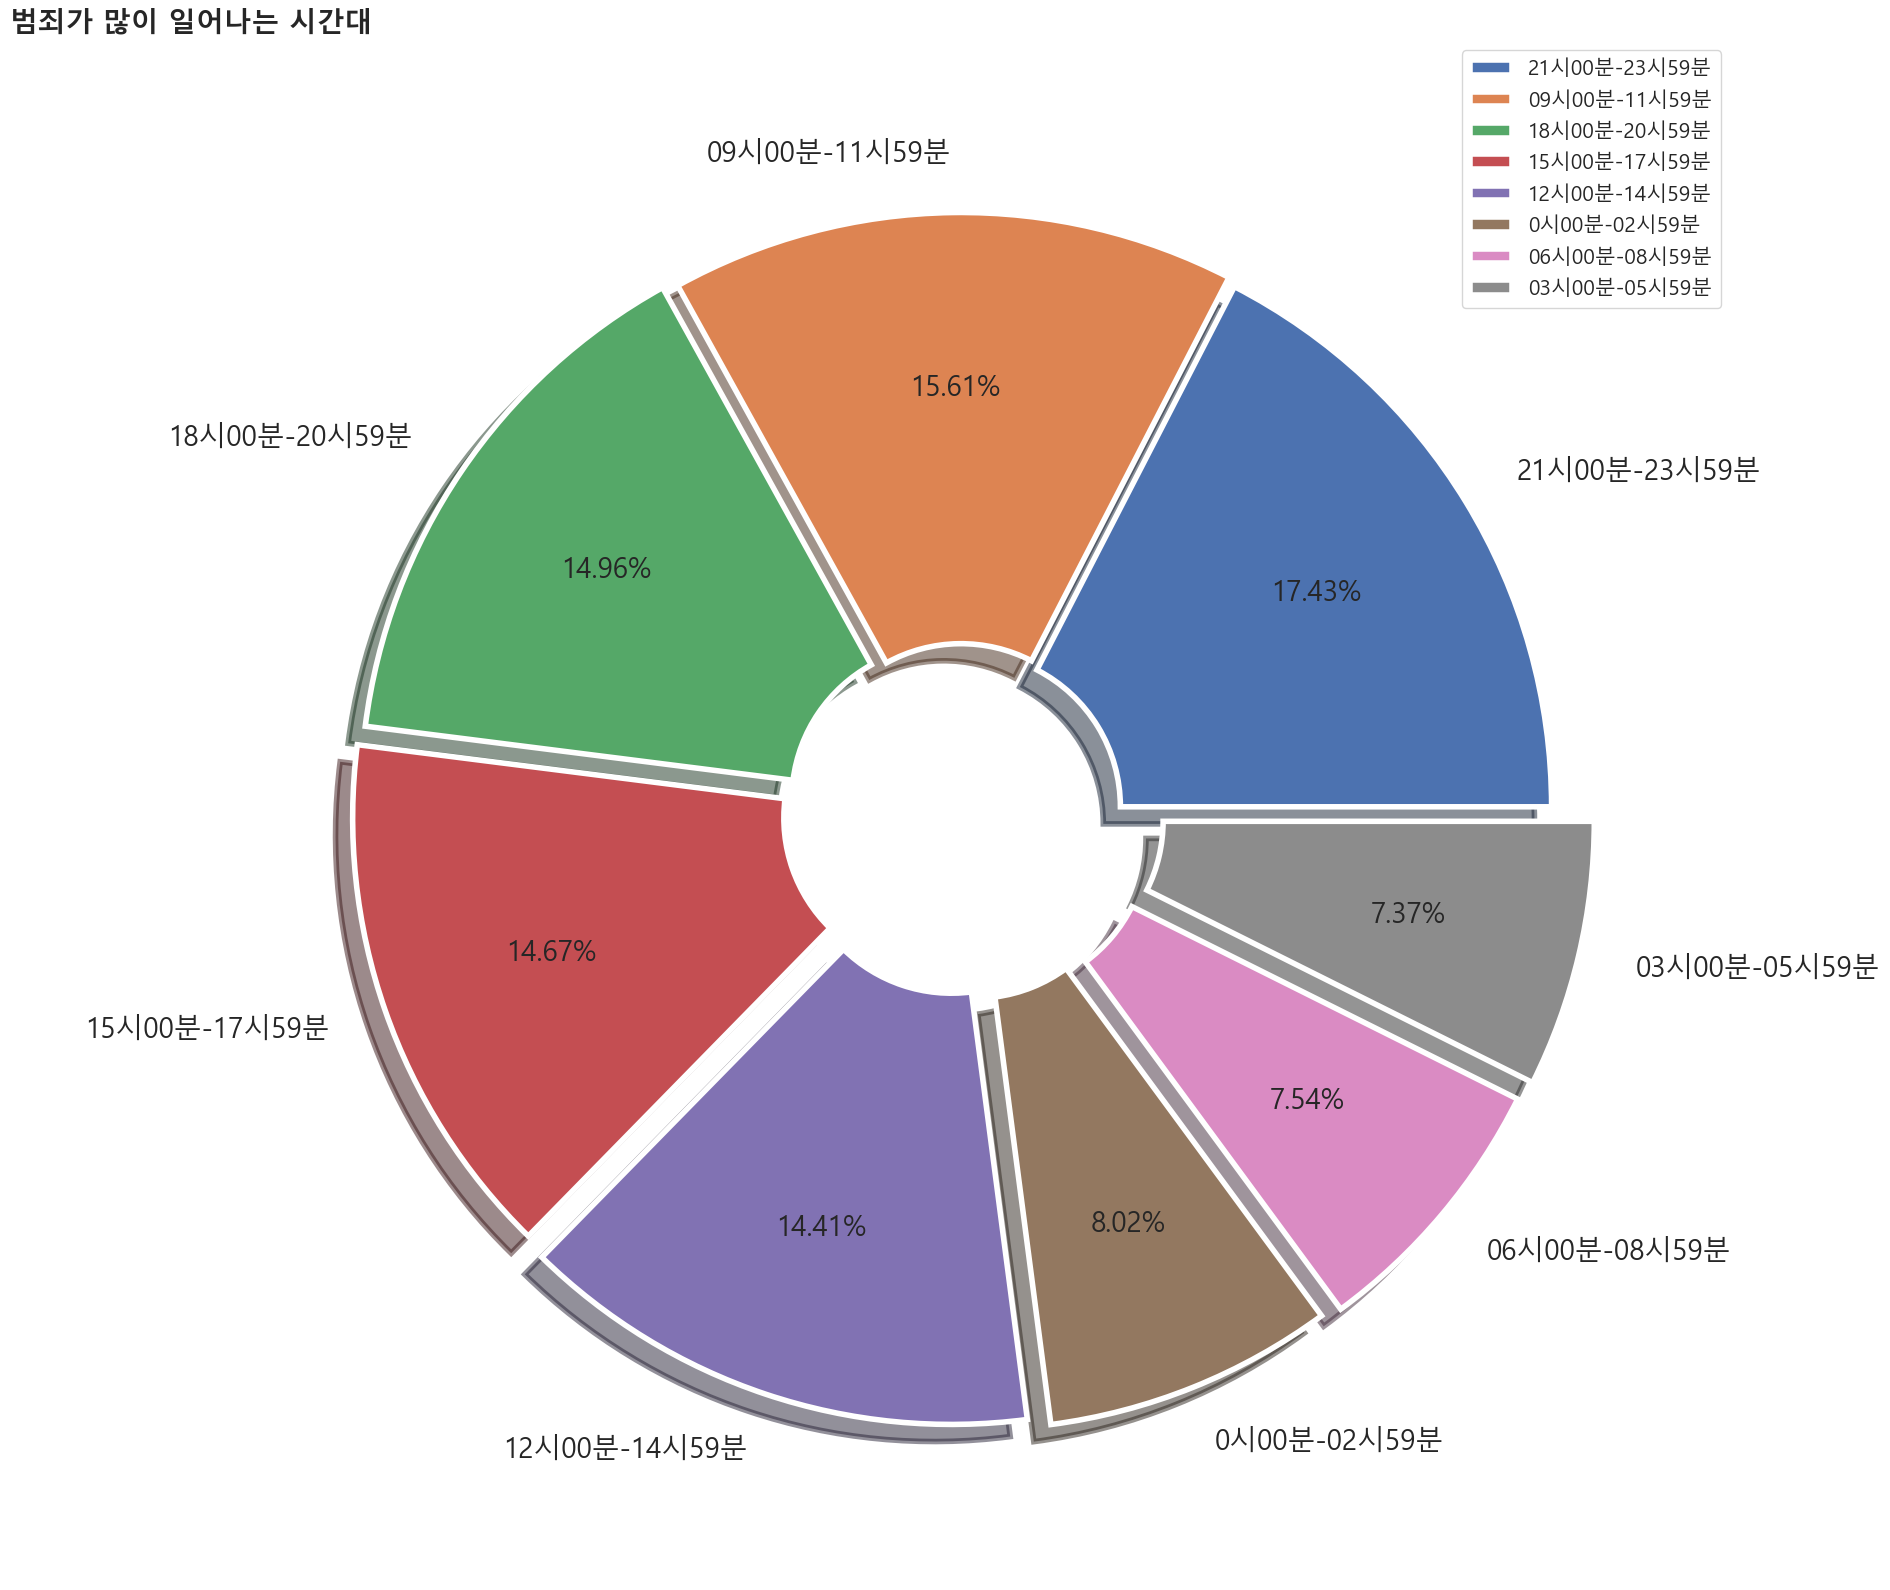

In [48]:
# explode: 부채꼴이 파이 차트의 중심에서 벗어나는 정도
explode = [0.01, 0.02, 0.03, 0.04, 0.05,
           0.06, 0.07, 0.08]

# wedgeprops: 테두리를 추가한다.
wedgeprops = ({'edgecolor' : 'w', 'width' : 0.7, "linewidth":4})

# startangle: 파이 차트의 각도를 돌린다.
plt.figure(figsize=(20, 20))
plt.pie(crime_class_t2_g['총 합계'], labels=crime_class_t2_g['시간대'], autopct='%1.2f%%', wedgeprops=wedgeprops, 
        pctdistance=0.7, labeldistance=1.10, explode=explode, textprops={'size' : 20}, shadow=True, radius=0.95
#         , startangle=90
       )
plt.title('범죄가 많이 일어나는 시간대', fontsize=20, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.legend(fontsize=15, loc='best')
plt.savefig('data/crime/분석 그래프/5_1. 범죄가 많이 일어나는 시간대(파이차트).png')
plt.show()


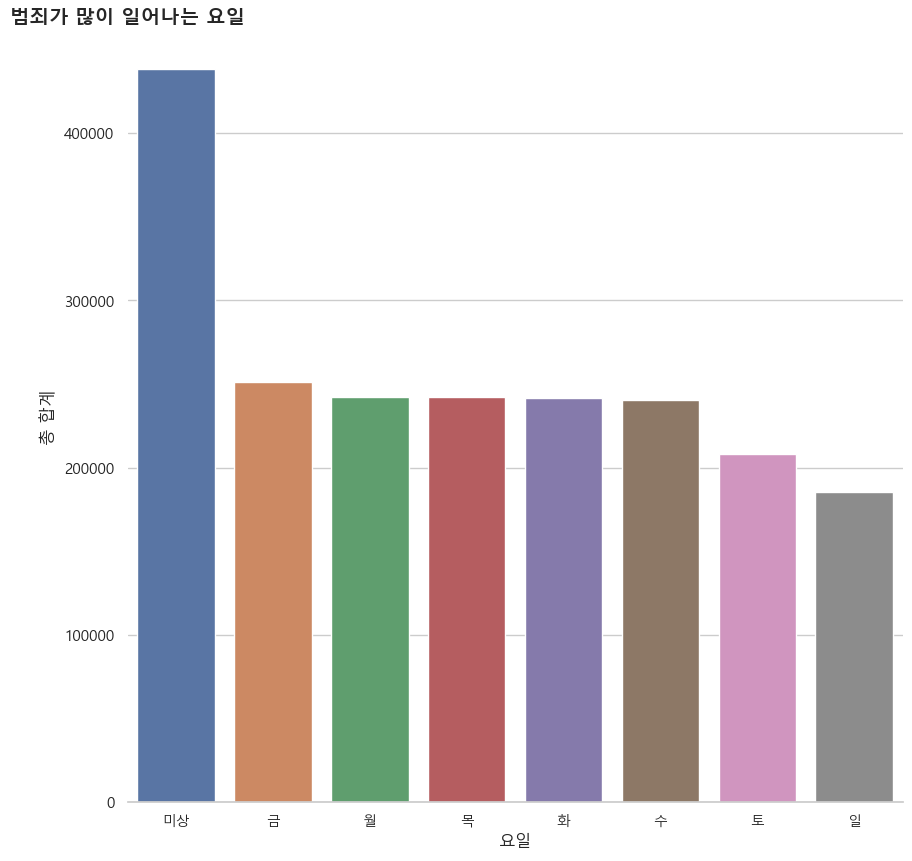

In [49]:
plt.figure(figsize=(10, 10))
sns.barplot(x='요일', y='총 합계', data=crime_class_t2_g_1)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
# 한글깨짐 방지, 마이너스기호 깨짐 방지, 하얀배경에 선으로 보기편한 스타일
sns.set_theme(font ='Malgun Gothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid') 
plt.title('범죄가 많이 일어나는 요일', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(fontsize=10)
plt.savefig('data/crime/분석 그래프/5_2. 범죄가 많이 일어나는 요일(바그래프).png')
plt.show()

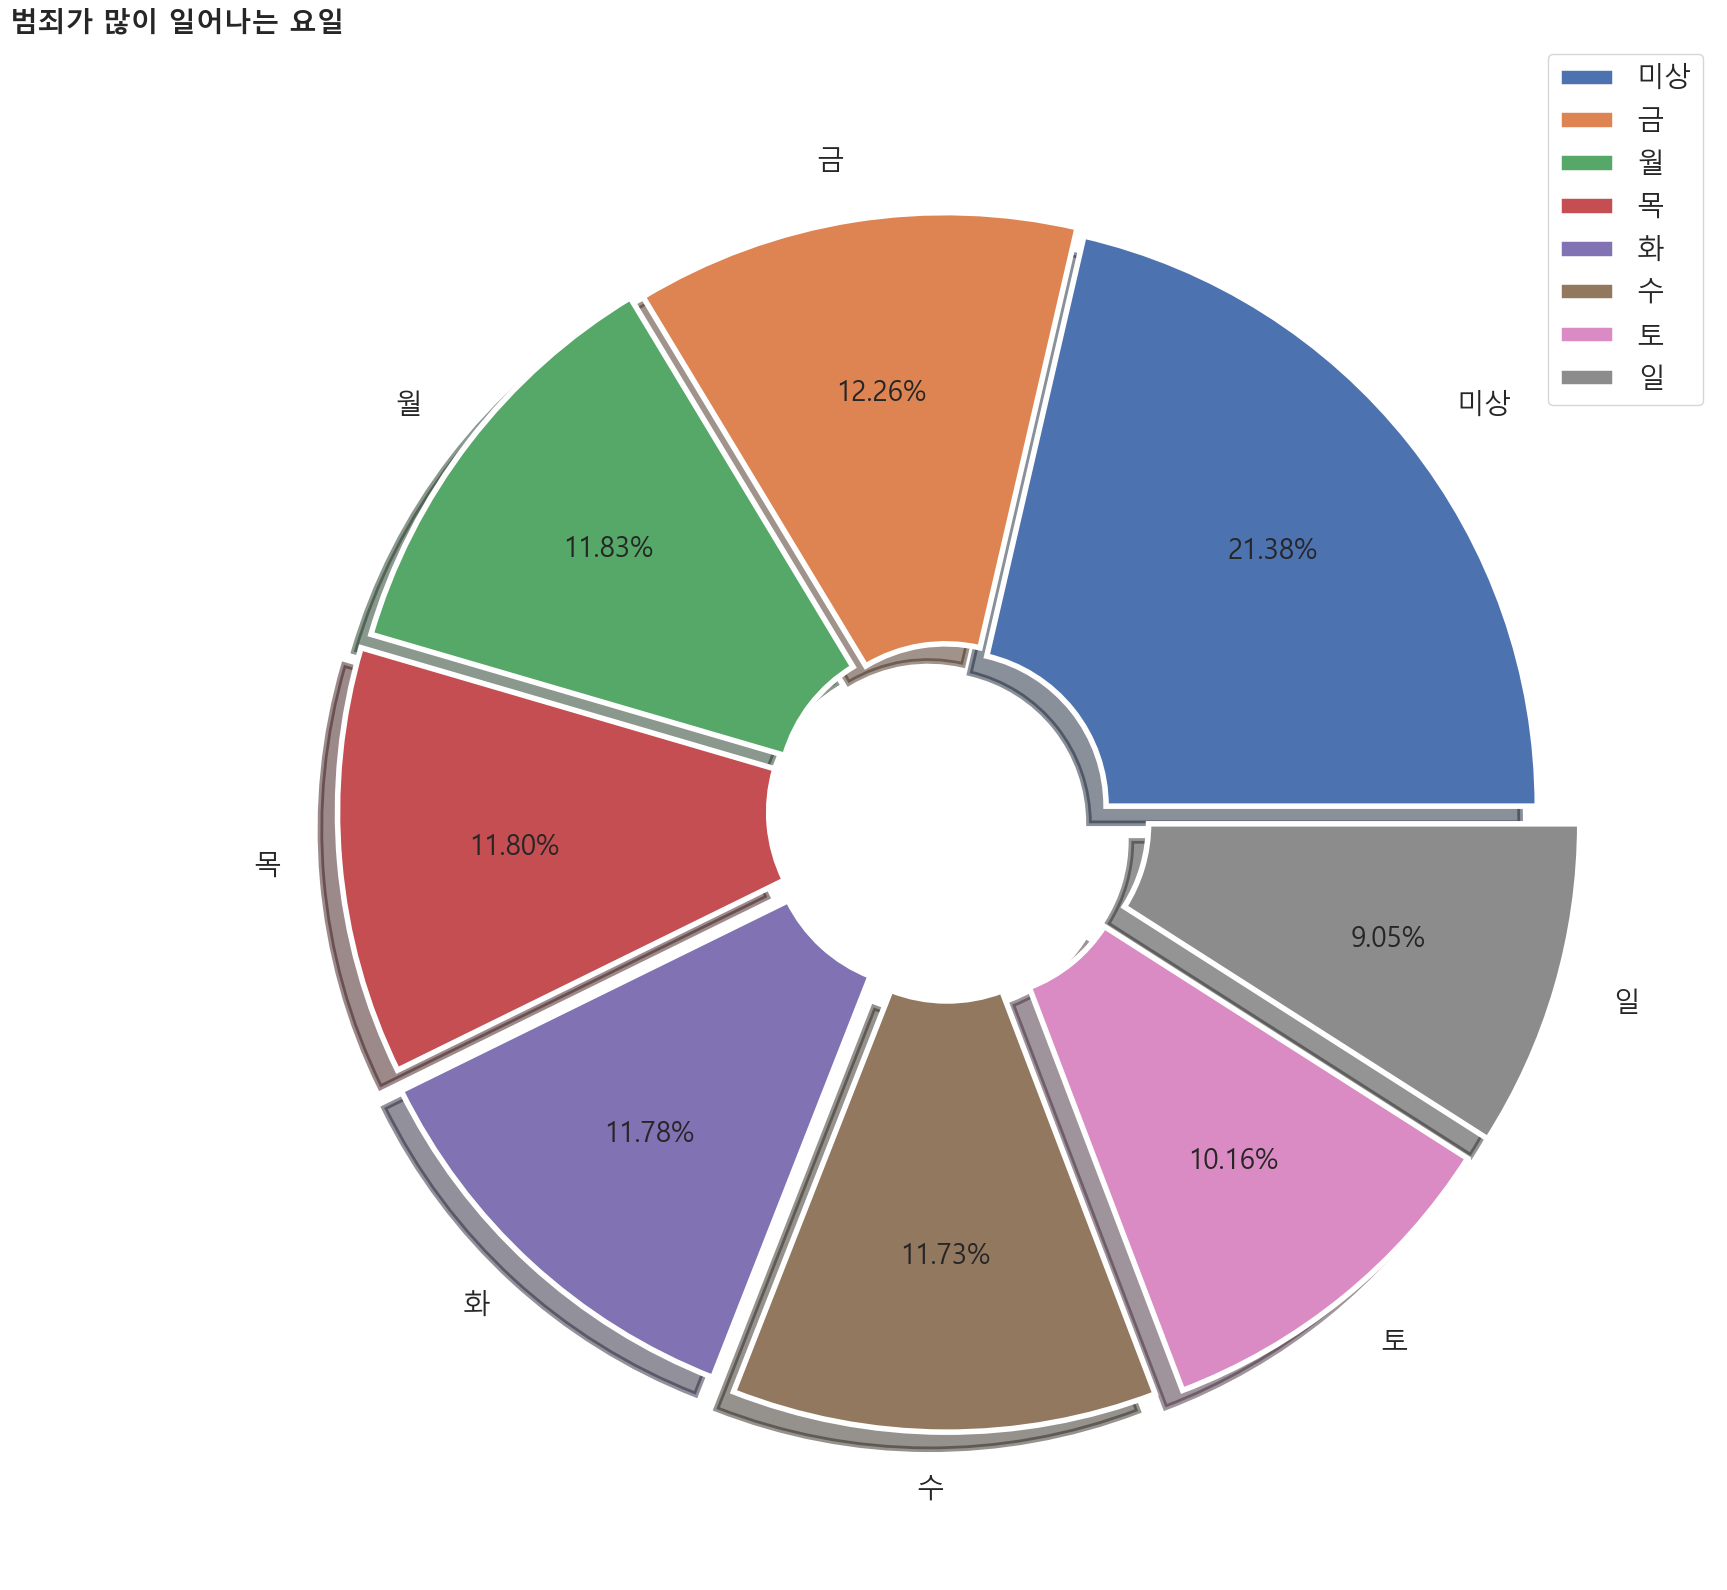

In [50]:
# explode: 부채꼴이 파이 차트의 중심에서 벗어나는 정도
explode = [0.01, 0.02, 0.03, 0.04, 0.05,
           0.06, 0.07, 0.08]

# wedgeprops: 테두리를 추가한다.
wedgeprops = ({'edgecolor' : 'w', 'width' : 0.7, "linewidth":4})

# startangle: 파이 차트의 각도를 돌린다.
plt.figure(figsize=(20, 20))
plt.pie(crime_class_t2_g_1['총 합계'], labels=crime_class_t2_g_1['요일'], autopct='%1.2f%%', wedgeprops=wedgeprops, 
        pctdistance=0.7, labeldistance=1.10, explode=explode, textprops={'size' : 20}, shadow=True, radius=0.95
#         , startangle=90
       )
plt.title('범죄가 많이 일어나는 요일', fontsize=20, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.legend(fontsize=20, loc='best')
plt.savefig('data/crime/분석 그래프/5_2. 범죄가 많이 일어나는 요일(파이차트).png')
plt.show()


### - 분석 결과
범죄가 많이 일어나는 시간대는 저녁 9시부터 12까지 자주일어나며 요일은 금요일이 제일 많이 일어납니다.

### 6. 범죄 발생으로부터 인지하는데 까지 걸리는 기간
### - 분석 데이터

In [51]:
# 범죄대분류를 기준으로 행,열 위치 교체와 지역별 합계 
crime_class_t3 = data3.groupby('범죄대분류').sum().T
crime_class_t3

범죄대분류,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
1시간이내,2325,107822,25577,30,633,194,2026,22,10,12325,22909,4476,33075,2248,475
2시간이내,474,9362,2625,1,77,0,112,6,2,2804,2222,697,6310,351,2
5시간이내,888,7555,4407,1,110,0,155,1,2,5050,3933,1290,9620,634,8
12시간이내,1262,8097,9455,25,298,105,965,17,6,6570,10937,2014,10114,848,293
24시간이내,1250,8889,8426,13,426,64,678,16,3,9133,12553,1720,9979,955,119
2일이내,1124,14049,7192,8,381,48,523,13,3,9358,9799,1378,11142,957,93
5일이내,2306,34715,16162,12,484,82,1287,30,5,19032,17773,2666,27850,1805,258
10일이내,2315,35627,18960,22,475,141,2014,36,2,24460,23334,3144,30847,1830,456
1개월이내,4137,53367,39579,56,1216,325,4262,57,24,40080,57683,6229,50563,3525,805
3개월이내,3030,24212,40141,69,1683,385,2738,38,29,28297,76112,6555,31356,3792,508


In [52]:
# 기존에 있는 범죄 대분류의 행의 값을 새로운 열로 생성
crime_class_t3 = crime_class_t3.reset_index()

# 컬럼명 변경
# inplace = True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다는 의미
crime_class_t3.rename(columns = {'index' : '범죄인지기간'}, inplace = True)

crime_class_t3

범죄대분류,범죄인지기간,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
0,1시간이내,2325,107822,25577,30,633,194,2026,22,10,12325,22909,4476,33075,2248,475
1,2시간이내,474,9362,2625,1,77,0,112,6,2,2804,2222,697,6310,351,2
2,5시간이내,888,7555,4407,1,110,0,155,1,2,5050,3933,1290,9620,634,8
3,12시간이내,1262,8097,9455,25,298,105,965,17,6,6570,10937,2014,10114,848,293
4,24시간이내,1250,8889,8426,13,426,64,678,16,3,9133,12553,1720,9979,955,119
5,2일이내,1124,14049,7192,8,381,48,523,13,3,9358,9799,1378,11142,957,93
6,5일이내,2306,34715,16162,12,484,82,1287,30,5,19032,17773,2666,27850,1805,258
7,10일이내,2315,35627,18960,22,475,141,2014,36,2,24460,23334,3144,30847,1830,456
8,1개월이내,4137,53367,39579,56,1216,325,4262,57,24,40080,57683,6229,50563,3525,805
9,3개월이내,3030,24212,40141,69,1683,385,2738,38,29,28297,76112,6555,31356,3792,508


In [53]:
# 범죄를인지하는기간중 어떤 기간이 제일높은지 알아보기
# axis=1 은 같은 행별로 계산하는 옵션
crime_class_t3_sum = np.sum(crime_class_t3.groupby('범죄인지기간').sum(), axis=1) 
crime_class_t3_sum.sort_values(ascending=False, inplace = True) # 높은순으로 정렬
crime_class_t3_sum

범죄인지기간
1개월이내     261908
3개월초과     246699
3개월이내     218945
1시간이내     214147
10일이내     143663
5일이내      124467
2일이내       56068
24시간이내     54224
12시간이내     51006
5시간이내      33654
2시간이내      25045
dtype: int64

In [54]:
# 데이터프레임 형식으로 인덱스 재설정
# reset_index(): 기존 행 인덱스를 제거하고 인덱스를 데이터 열 추가
# 장소라는 인덱스를 열로 변환
crime_class_t3_g_1 = pd.DataFrame(crime_class_t3_sum).reset_index()

# 컬럼명 변경
# inplace = True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다는 의미
crime_class_t3_g_1.rename(columns = {0:'총 합계'}, inplace = True)

# 총 합계를 기준으로 내림차순 정렬
#  ascending=False: 내림차순, True는 오름차순
crime_class_t3_g_1.sort_values(by='총 합계', ascending=False, inplace = True)

crime_class_t3_g_1

,범죄인지기간,총 합계
0,1개월이내,261908
1,3개월초과,246699
2,3개월이내,218945
3,1시간이내,214147
4,10일이내,143663
5,5일이내,124467
6,2일이내,56068
7,24시간이내,54224
8,12시간이내,51006
9,5시간이내,33654


In [89]:
dfi.export(crime_class_t3_g_1, 'data/crime/분석한 데이터(표, 데이터 프레임)/범죄인지기간의 총 합계.png')

### - 분석 결과 시각화

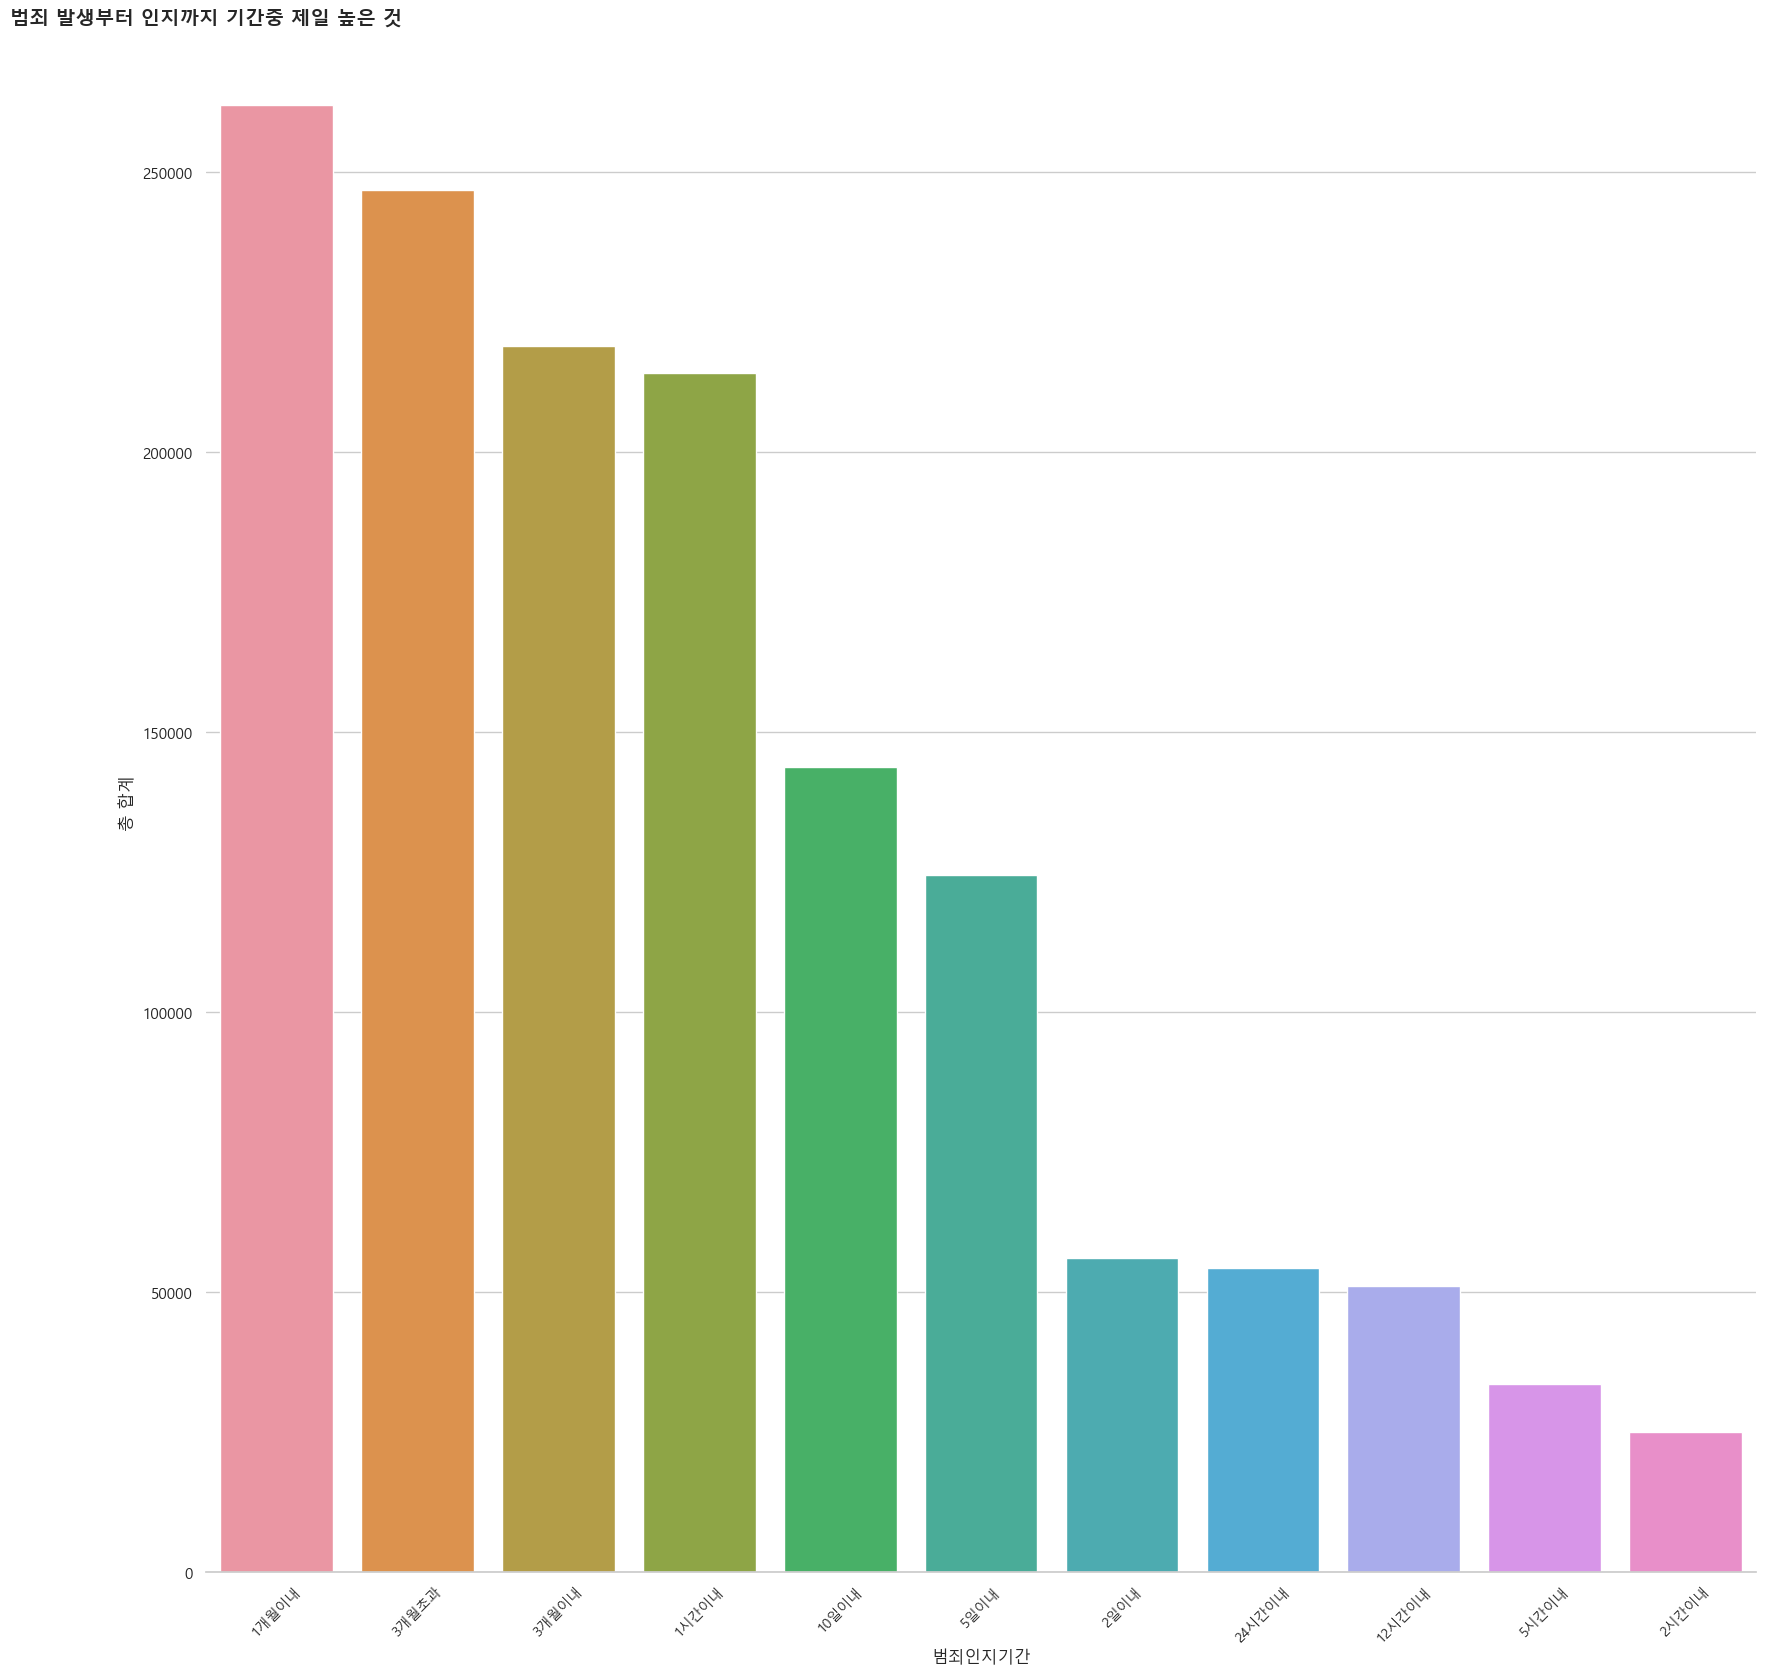

In [55]:
plt.figure(figsize=(20, 20))
sns.barplot(x='범죄인지기간', y='총 합계', data=crime_class_t3_g_1)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
# 한글깨짐 방지, 마이너스기호 깨짐 방지, 하얀배경에 선으로 보기편한 스타일
sns.set_theme(font ='Malgun Gothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid') 
plt.title('범죄 발생부터 인지까지 기간중 제일 높은 것', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=45, fontsize=10)
plt.savefig('data/crime/분석 그래프/6. 범죄 발생으로부터 인지하는데 까지 걸리는 기간(바그레프).png')
plt.show()

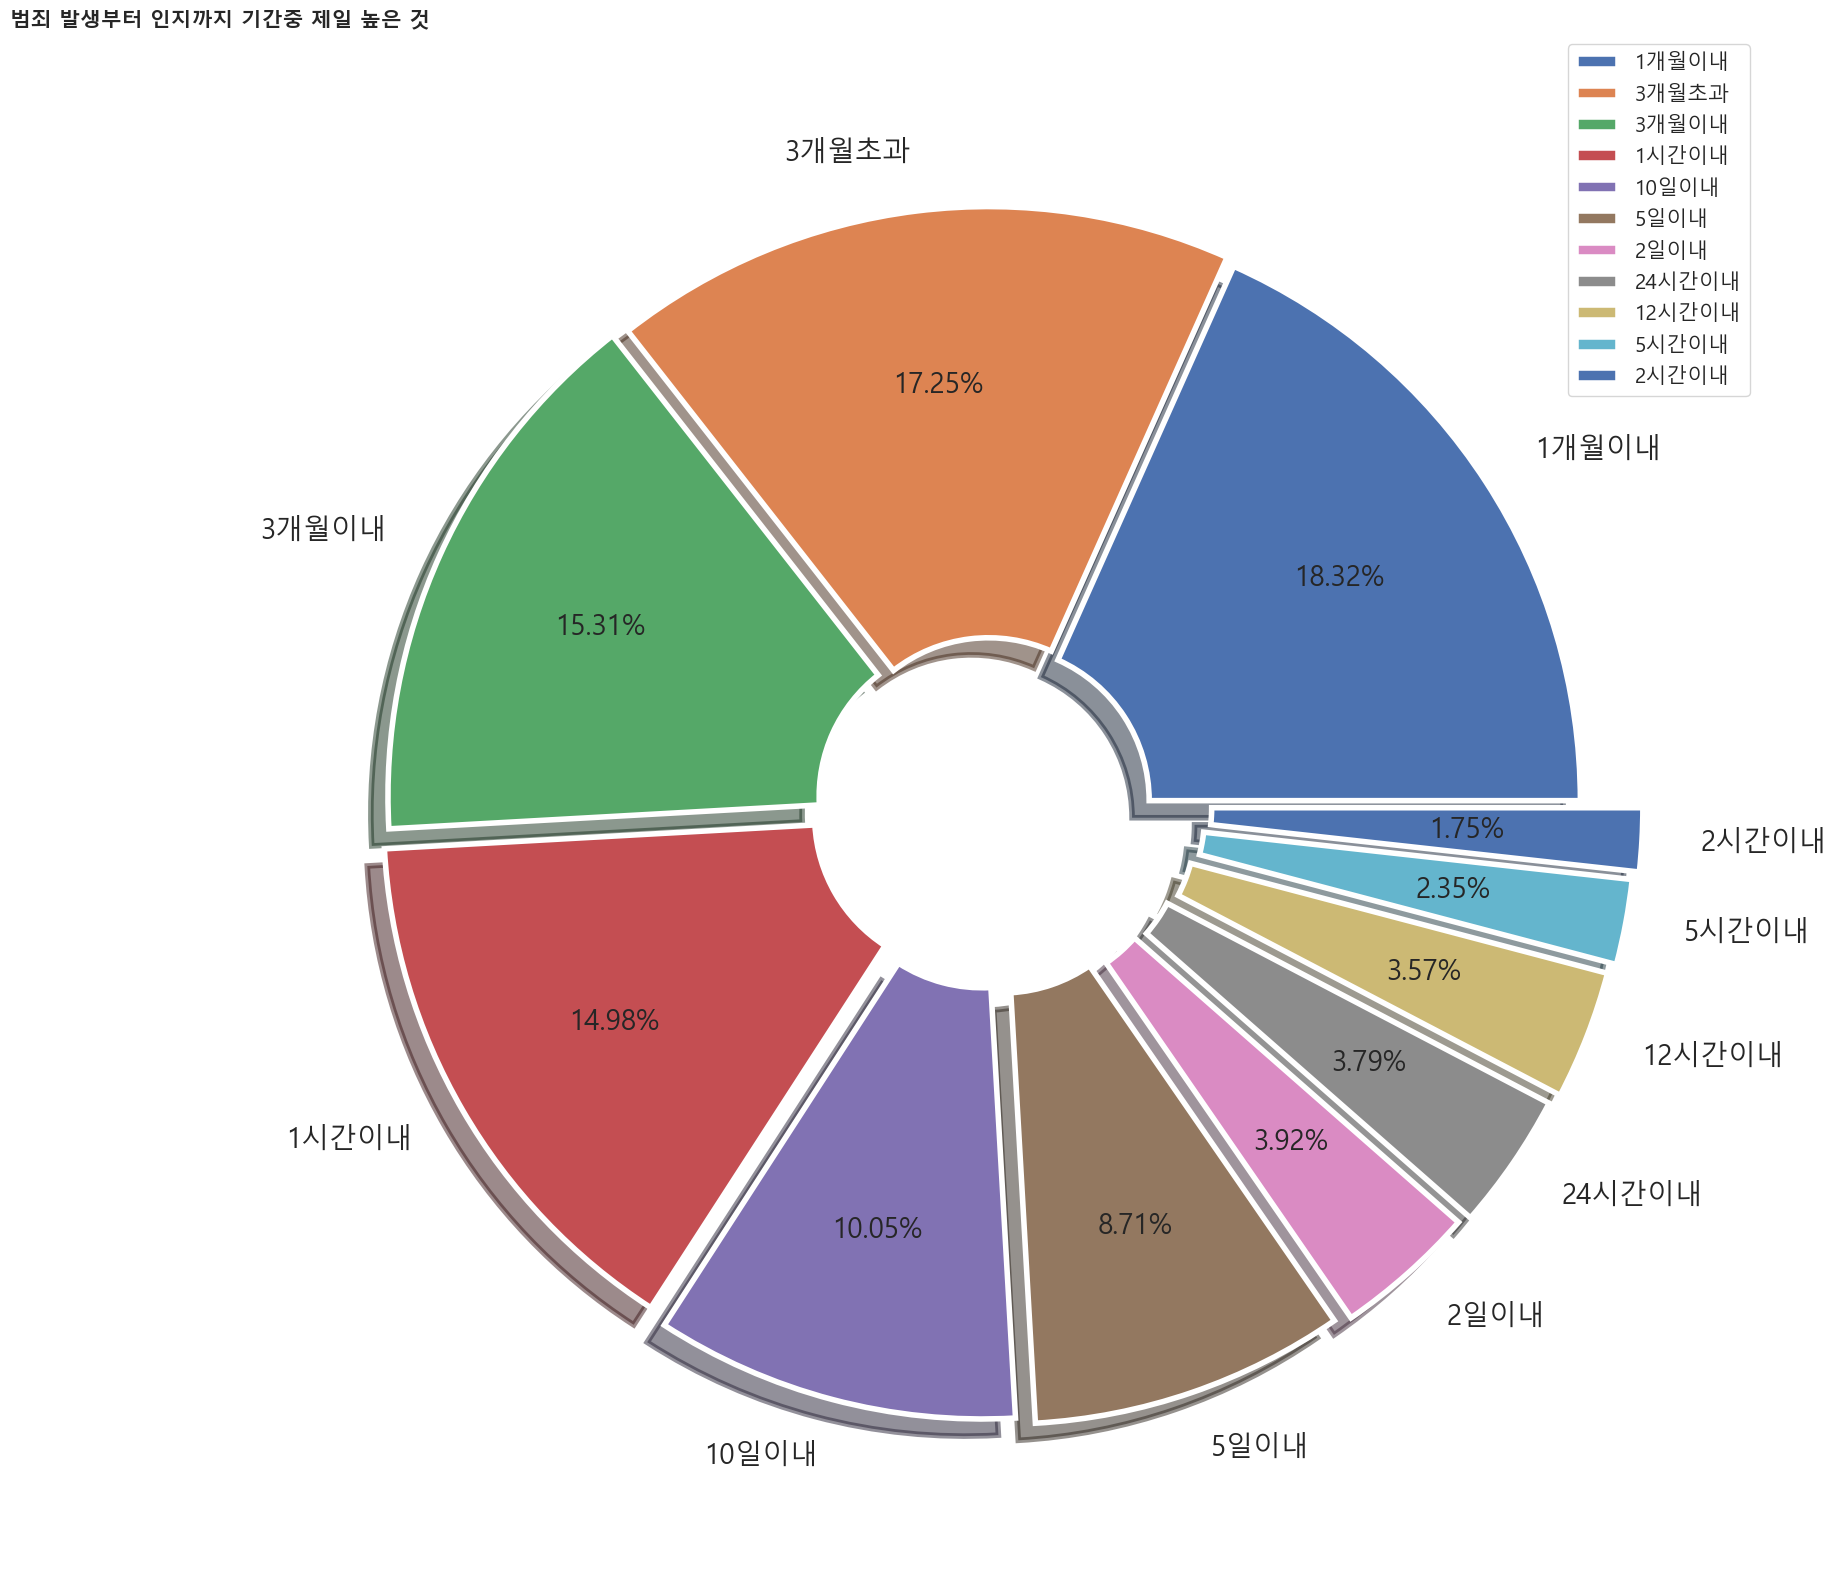

In [56]:
# explode: 부채꼴이 파이 차트의 중심에서 벗어나는 정도
explode = [0.01, 0.02, 0.03, 0.04, 0.05,
           0.06, 0.07, 0.08, 0.09, 0.10,
           0.11]

# wedgeprops: 테두리를 추가한다.
wedgeprops = ({'edgecolor' : 'w', 'width' : 0.7, "linewidth":4})

# startangle: 파이 차트의 각도를 돌린다.
plt.figure(figsize=(20, 20))
plt.pie(crime_class_t3_g_1['총 합계'], labels=crime_class_t3_g_1['범죄인지기간'], autopct='%1.2f%%', wedgeprops=wedgeprops, 
        pctdistance=0.7, labeldistance=1.10, explode=explode, textprops={'size' : 20}, shadow=True, radius=0.95
#         , startangle=90
       )
plt.title('범죄 발생부터 인지까지 기간중 제일 높은 것', fontsize=15, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.legend(fontsize=15, loc='best')
plt.savefig('data/crime/분석 그래프/6. 범죄 발생으로부터 인지하는데 까지 걸리는 기간(파이차트).png')
plt.show()


### - 분석 결과
범죄 발생부터 인지하는데 걸리는 기간은 1개월이내와 3개월 초과가 제일많은 기간으로 나타났습니다.

### 7. 전국 범죄 발생과 검거현황
### - 분석 데이터

In [57]:
# 범죄대분류를 기준으로 행,열 위치 교체와 지역별 합계 
crime_class_t4 = data4.groupby('범죄대분류').sum().T
crime_class_t4

범죄대분류,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
발생,22476,308634,243082,406,8088,1823,16936,274,206,166409,361107,40708,232661,23360,3656
검거,21294,300680,210383,383,7569,1365,16229,199,150,104013,215471,34525,200808,20139,3457
검거인원(남),22074,257970,164883,511,7784,2011,22561,254,702,62135,177437,36431,217260,26784,3583
검거인원(여),1095,55889,60441,163,2722,2,16852,59,146,24678,53190,11642,48866,2777,303
불상,136,1984,14812,15,101,3,340,58,12,749,53370,2880,3317,1358,65
법인체,1,1091,4396,92,16,15,363,2,0,5,471,2454,13,10,1388


In [58]:
# 기존에 있는 범죄 대분류의 행의 값을 새로운 열로 생성
crime_class_t4 = crime_class_t4.reset_index()

# 컬럼명 변경
# inplace = True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다는 의미
crime_class_t4.rename(columns = {'index' : '범죄 발생 및 검거'}, inplace = True)

crime_class_t4

범죄대분류,범죄 발생 및 검거,강력범죄,교통범죄,기타범죄,노동범죄,마약범죄,병역범죄,보건범죄,선거범죄,안보범죄,절도범죄,지능범죄,특별경제범죄,폭력범죄,풍속범죄,환경범죄
0,발생,22476,308634,243082,406,8088,1823,16936,274,206,166409,361107,40708,232661,23360,3656
1,검거,21294,300680,210383,383,7569,1365,16229,199,150,104013,215471,34525,200808,20139,3457
2,검거인원(남),22074,257970,164883,511,7784,2011,22561,254,702,62135,177437,36431,217260,26784,3583
3,검거인원(여),1095,55889,60441,163,2722,2,16852,59,146,24678,53190,11642,48866,2777,303
4,불상,136,1984,14812,15,101,3,340,58,12,749,53370,2880,3317,1358,65
5,법인체,1,1091,4396,92,16,15,363,2,0,5,471,2454,13,10,1388


In [59]:
# 범죄 발생 및 검거중 어떤 것이 제일높은지 알아보기
# axis=1 은 같은 행별로 계산하는 옵션
crime_class_t4_sum = np.sum(crime_class_t4.groupby('범죄 발생 및 검거').sum(), axis=1) 
crime_class_t4_sum.sort_values(ascending=False, inplace = True) # 높은순으로 정렬
crime_class_t4_sum

범죄 발생 및 검거
발생         1429826
검거         1136665
검거인원(남)    1002380
검거인원(여)     278825
불상           79200
법인체          10317
dtype: int64

In [60]:
# <데이터프레임 형식으로 인덱스 재설정>
# reset_index(): 기존 행 인덱스를 제거하고 인덱스를 데이터 열 추가
# 장소라는 인덱스를 열로 변환
crime_class_t4_g_1 = pd.DataFrame(crime_class_t4_sum).reset_index()

# 컬럼명 변경
# inplace = True: 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다는 의미
crime_class_t4_g_1.rename(columns = {0:'총 합계'}, inplace = True)

# 총 합계를 기준으로 내림차순 정렬
#  ascending=False: 내림차순, True는 오름차순
crime_class_t4_g_1.sort_values(by='총 합계', ascending=False, inplace = True)

crime_class_t4_g_1

,범죄 발생 및 검거,총 합계
0,발생,1429826
1,검거,1136665
2,검거인원(남),1002380
3,검거인원(여),278825
4,불상,79200
5,법인체,10317


In [90]:
dfi.export(crime_class_t4_g_1, 'data/crime/분석한 데이터(표, 데이터 프레임)/범죄 발생 및 검거의 총 합계.png')

### - 분석 결과 시각화

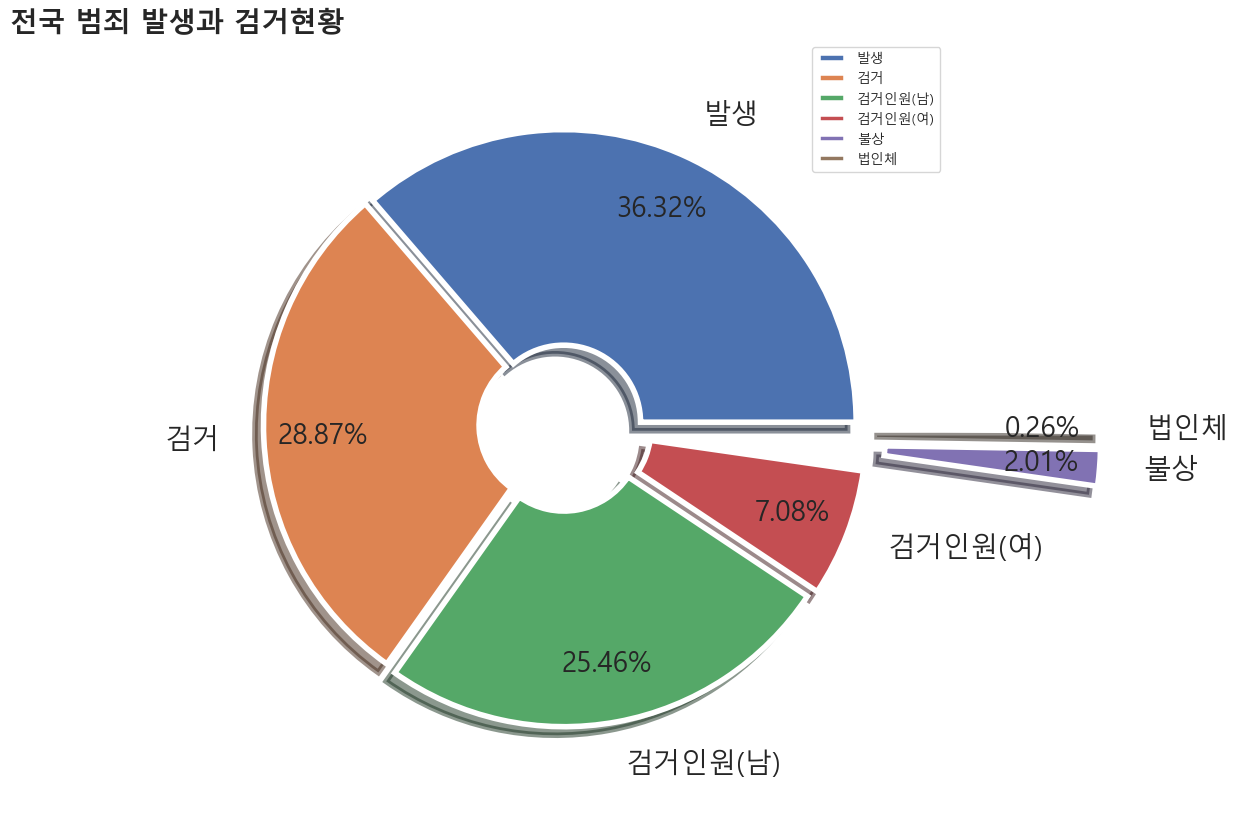

In [75]:
# pie는 labels이 있어야 출력된다. 
labels = ['발생', '검거', '검거인원(남)', '검거인원(여)', '불상', '법인체']

# explode: 부채꼴이 파이 차트의 중심에서 벗어나는 정도
explode = [0.01, 0.02, 0.03, 0.04, 0.8, 0.8]

# wedgeprops: 테두리를 추가한다.
wedgeprops = ({'edgecolor' : 'w', 'width' : 0.7, "linewidth":4})

# startangle: 파이 차트의 각도를 돌린다.
plt.figure(figsize=(15, 10))
plt.pie(crime_class_t4_sum, labels=labels, autopct='%1.2f%%', wedgeprops=wedgeprops, pctdistance=0.8, labeldistance=1.15,
        explode=explode, textprops={'size' : 20}, shadow=True, radius=0.95
#         startangle=50
       )
plt.title('전국 범죄 발생과 검거현황', fontsize=20, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.legend(fontsize=10, loc='best')
plt.savefig('data/crime/분석 그래프/7. 전국 범죄 발생과 검거현황(파이차트).png')
plt.show()

### - 분석 결과
전국적으로는 범죄 발생은 36%정도로 1순위이며 검거율은 28%, 검거되는 인원 중 남성25%, 여성7%정도로 남성이 범죄를 많이 일으킨다는것을 알수가 있습니다.

### 8. 지역별 인구수에 따른 범죄 발생율 
### - 분석 데이터

In [62]:
# 범죄 데이터프레임과 합칠 행 생성
def region(region_g):
    if '서울' in region_g:
        return '서울'
    elif '부산' in region_g:
        return '부산'
    elif '대구' in region_g:
        return '대구'
    elif '인천' in region_g:
        return '인천'
    elif '광주' in region_g:
        return '광주'
    elif '대전' in region_g:
        return '대전'
    elif '울산' in region_g:
        return '울산'
    elif '세종' in region_g:
        return '세종'
    elif '경기' in region_g:
        return '경기'
    elif '강원' in region_g:
        return '강원'
    elif '충청북도' in region_g:
        return '충북'
    elif '충청남도' in region_g:
        return '충남'
    elif '전라북도' in region_g:
        return '전북'
    elif '전라남도' in region_g:
        return '전남'
    elif '경상북도' in region_g:
        return '경북'
    elif '경상남도' in region_g:
        return '경남'
    elif '제주' in region_g:
        return '제주'

data5['지역'] = data5['행정구역'].apply(region)
data5

,행정구역,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율,지역
0,전국,51370001,23900917,2,25592335,25777666,1,None
1,서울특별시,9407540,4475726,2,4552501,4855039,1,서울
2,부산광역시,3300836,1565115,2,1609650,1691186,1,부산
3,대구광역시,2377801,1092536,2,1168679,1209122,1,대구
4,인천광역시,2987918,1344029,2,1494725,1493193,1,인천
5,광주광역시,1422999,656061,2,702748,720251,1,광주
6,대전광역시,1444595,680653,2,720520,724075,1,대전
7,울산광역시,1104167,489298,2,567314,536853,1,울산
8,세종특별자치시,385932,160479,2,192246,193686,1,세종
9,경기도,13626339,5969573,2,6855626,6770713,1,경기


In [63]:
crime_class_t_gg = crime_class_t_g.rename(columns = {'총 합계' :'범죄 총 합계'})
crime_class_t_gg

,지역,범죄 총 합계
1,경기,409974
10,서울,355341
9,부산,143713
8,도시이외,115794
2,경남,107025
13,인천,101931
6,대구,98758
3,경북,77609
4,광주,71919
17,충남,58416


In [64]:
# 전체인구와 범죄 데이터 합치기
national_crime = pd.merge(data5, crime_class_t_gg, how='outer')
national_crime

,행정구역,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율,지역,범죄 총 합계
0,전국,51370001.0,23900917.0,2.0,25592335.0,25777666.0,1.0,None,NaN
1,서울특별시,9407540.0,4475726.0,2.0,4552501.0,4855039.0,1.0,서울,355341.0
2,부산광역시,3300836.0,1565115.0,2.0,1609650.0,1691186.0,1.0,부산,143713.0
3,대구광역시,2377801.0,1092536.0,2.0,1168679.0,1209122.0,1.0,대구,98758.0
4,인천광역시,2987918.0,1344029.0,2.0,1494725.0,1493193.0,1.0,인천,101931.0
5,광주광역시,1422999.0,656061.0,2.0,702748.0,720251.0,1.0,광주,71919.0
6,대전광역시,1444595.0,680653.0,2.0,720520.0,724075.0,1.0,대전,49577.0
7,울산광역시,1104167.0,489298.0,2.0,567314.0,536853.0,1.0,울산,45141.0
8,세종특별자치시,385932.0,160479.0,2.0,192246.0,193686.0,1.0,세종,3660.0
9,경기도,13626339.0,5969573.0,2.0,6855626.0,6770713.0,1.0,경기,409974.0


In [65]:
# 결측값(null) 제거하기
national_crime = national_crime.dropna(axis=0)
national_crime

,행정구역,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율,지역,범죄 총 합계
1,서울특별시,9407540.0,4475726.0,2.0,4552501.0,4855039.0,1.0,서울,355341.0
2,부산광역시,3300836.0,1565115.0,2.0,1609650.0,1691186.0,1.0,부산,143713.0
3,대구광역시,2377801.0,1092536.0,2.0,1168679.0,1209122.0,1.0,대구,98758.0
4,인천광역시,2987918.0,1344029.0,2.0,1494725.0,1493193.0,1.0,인천,101931.0
5,광주광역시,1422999.0,656061.0,2.0,702748.0,720251.0,1.0,광주,71919.0
6,대전광역시,1444595.0,680653.0,2.0,720520.0,724075.0,1.0,대전,49577.0
7,울산광역시,1104167.0,489298.0,2.0,567314.0,536853.0,1.0,울산,45141.0
8,세종특별자치시,385932.0,160479.0,2.0,192246.0,193686.0,1.0,세종,3660.0
9,경기도,13626339.0,5969573.0,2.0,6855626.0,6770713.0,1.0,경기,409974.0
10,강원특별자치도,1530712.0,760903.0,2.0,770130.0,760582.0,1.0,강원,44178.0


In [66]:
# 범죄발생비율구하기
national_crime['범죄발생비율'] = national_crime['범죄 총 합계']/national_crime['2023년09월_총인구수']
national_crime

,행정구역,2023년09월_총인구수,2023년09월_세대수,2023년09월_세대당 인구,2023년09월_남자 인구수,2023년09월_여자 인구수,2023년09월_남여 비율,지역,범죄 총 합계,범죄발생비율
1,서울특별시,9407540.0,4475726.0,2.0,4552501.0,4855039.0,1.0,서울,355341.0,0.037772
2,부산광역시,3300836.0,1565115.0,2.0,1609650.0,1691186.0,1.0,부산,143713.0,0.043538
3,대구광역시,2377801.0,1092536.0,2.0,1168679.0,1209122.0,1.0,대구,98758.0,0.041533
4,인천광역시,2987918.0,1344029.0,2.0,1494725.0,1493193.0,1.0,인천,101931.0,0.034114
5,광주광역시,1422999.0,656061.0,2.0,702748.0,720251.0,1.0,광주,71919.0,0.050540
6,대전광역시,1444595.0,680653.0,2.0,720520.0,724075.0,1.0,대전,49577.0,0.034319
7,울산광역시,1104167.0,489298.0,2.0,567314.0,536853.0,1.0,울산,45141.0,0.040882
8,세종특별자치시,385932.0,160479.0,2.0,192246.0,193686.0,1.0,세종,3660.0,0.009484
9,경기도,13626339.0,5969573.0,2.0,6855626.0,6770713.0,1.0,경기,409974.0,0.030087
10,강원특별자치도,1530712.0,760903.0,2.0,770130.0,760582.0,1.0,강원,44178.0,0.028861


In [67]:
# 범죄율 데이터 프레임
national_crime1 = national_crime[['행정구역', '범죄발생비율']]
national_crime1

,행정구역,범죄발생비율
1,서울특별시,0.037772
2,부산광역시,0.043538
3,대구광역시,0.041533
4,인천광역시,0.034114
5,광주광역시,0.050540
6,대전광역시,0.034319
7,울산광역시,0.040882
8,세종특별자치시,0.009484
9,경기도,0.030087
10,강원특별자치도,0.028861


In [68]:
national_crime1 = national_crime1.rename(columns = {'행정구역' :'지역'})
national_crime1

,지역,범죄발생비율
1,서울특별시,0.037772
2,부산광역시,0.043538
3,대구광역시,0.041533
4,인천광역시,0.034114
5,광주광역시,0.050540
6,대전광역시,0.034319
7,울산광역시,0.040882
8,세종특별자치시,0.009484
9,경기도,0.030087
10,강원특별자치도,0.028861


In [69]:
national_crime1 = national_crime1.sort_values(by='범죄발생비율', ascending=False)
national_crime1

,지역,범죄발생비율
17,제주특별자치도,0.052647
5,광주광역시,0.050540
2,부산광역시,0.043538
3,대구광역시,0.041533
7,울산광역시,0.040882
1,서울특별시,0.037772
6,대전광역시,0.034319
4,인천광역시,0.034114
16,경상남도,0.032860
15,경상북도,0.030317


In [91]:
dfi.export(national_crime1, 'data/crime/분석한 데이터(표, 데이터 프레임)/지역별 인구수에 따른 범죄 발생율의 총 합계.png')

### - 분석 결과 시각화

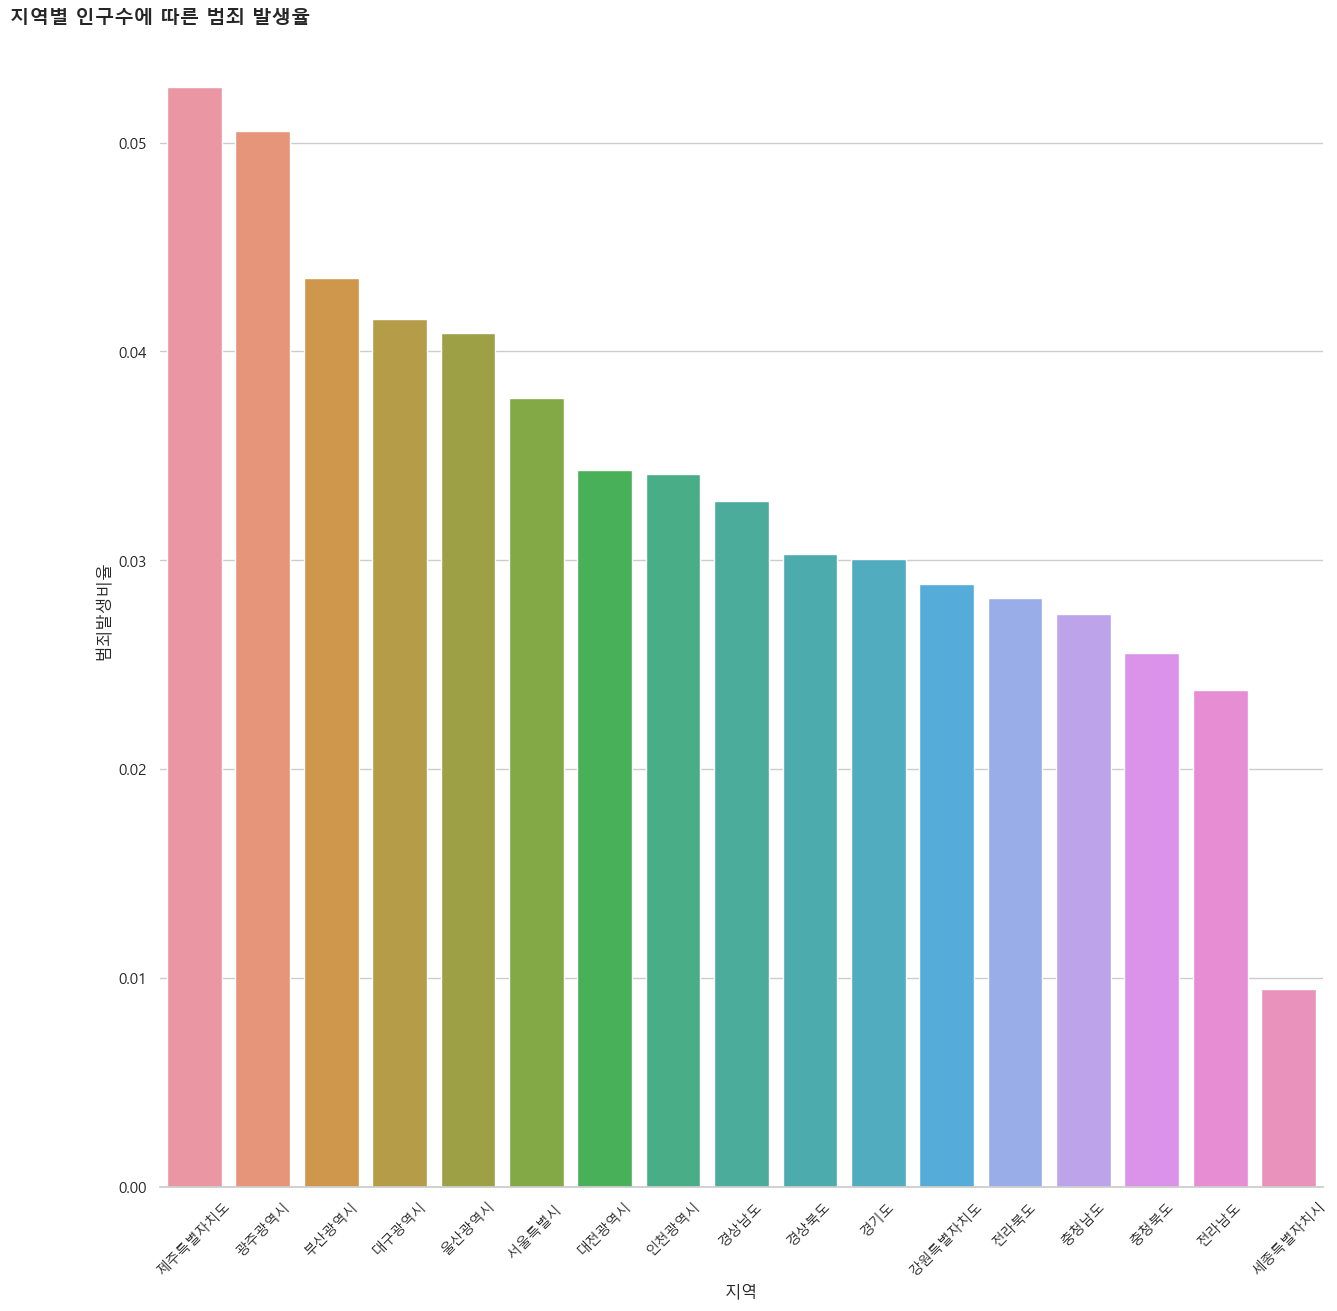

In [70]:
plt.figure(figsize=(15, 15))
sns.barplot(x='지역', y='범죄발생비율', data=national_crime1)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
# 한글깨짐 방지, 마이너스기호 깨짐 방지, 하얀배경에 선으로 보기편한 스타일
sns.set_theme(font ='Malgun Gothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid') 
plt.title('지역별 인구수에 따른 범죄 발생율', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=45, fontsize=10)
plt.savefig('data/crime/분석 그래프/8. 지역별 인구수에 따른 범죄 발생율(바그래프).png')
plt.show()

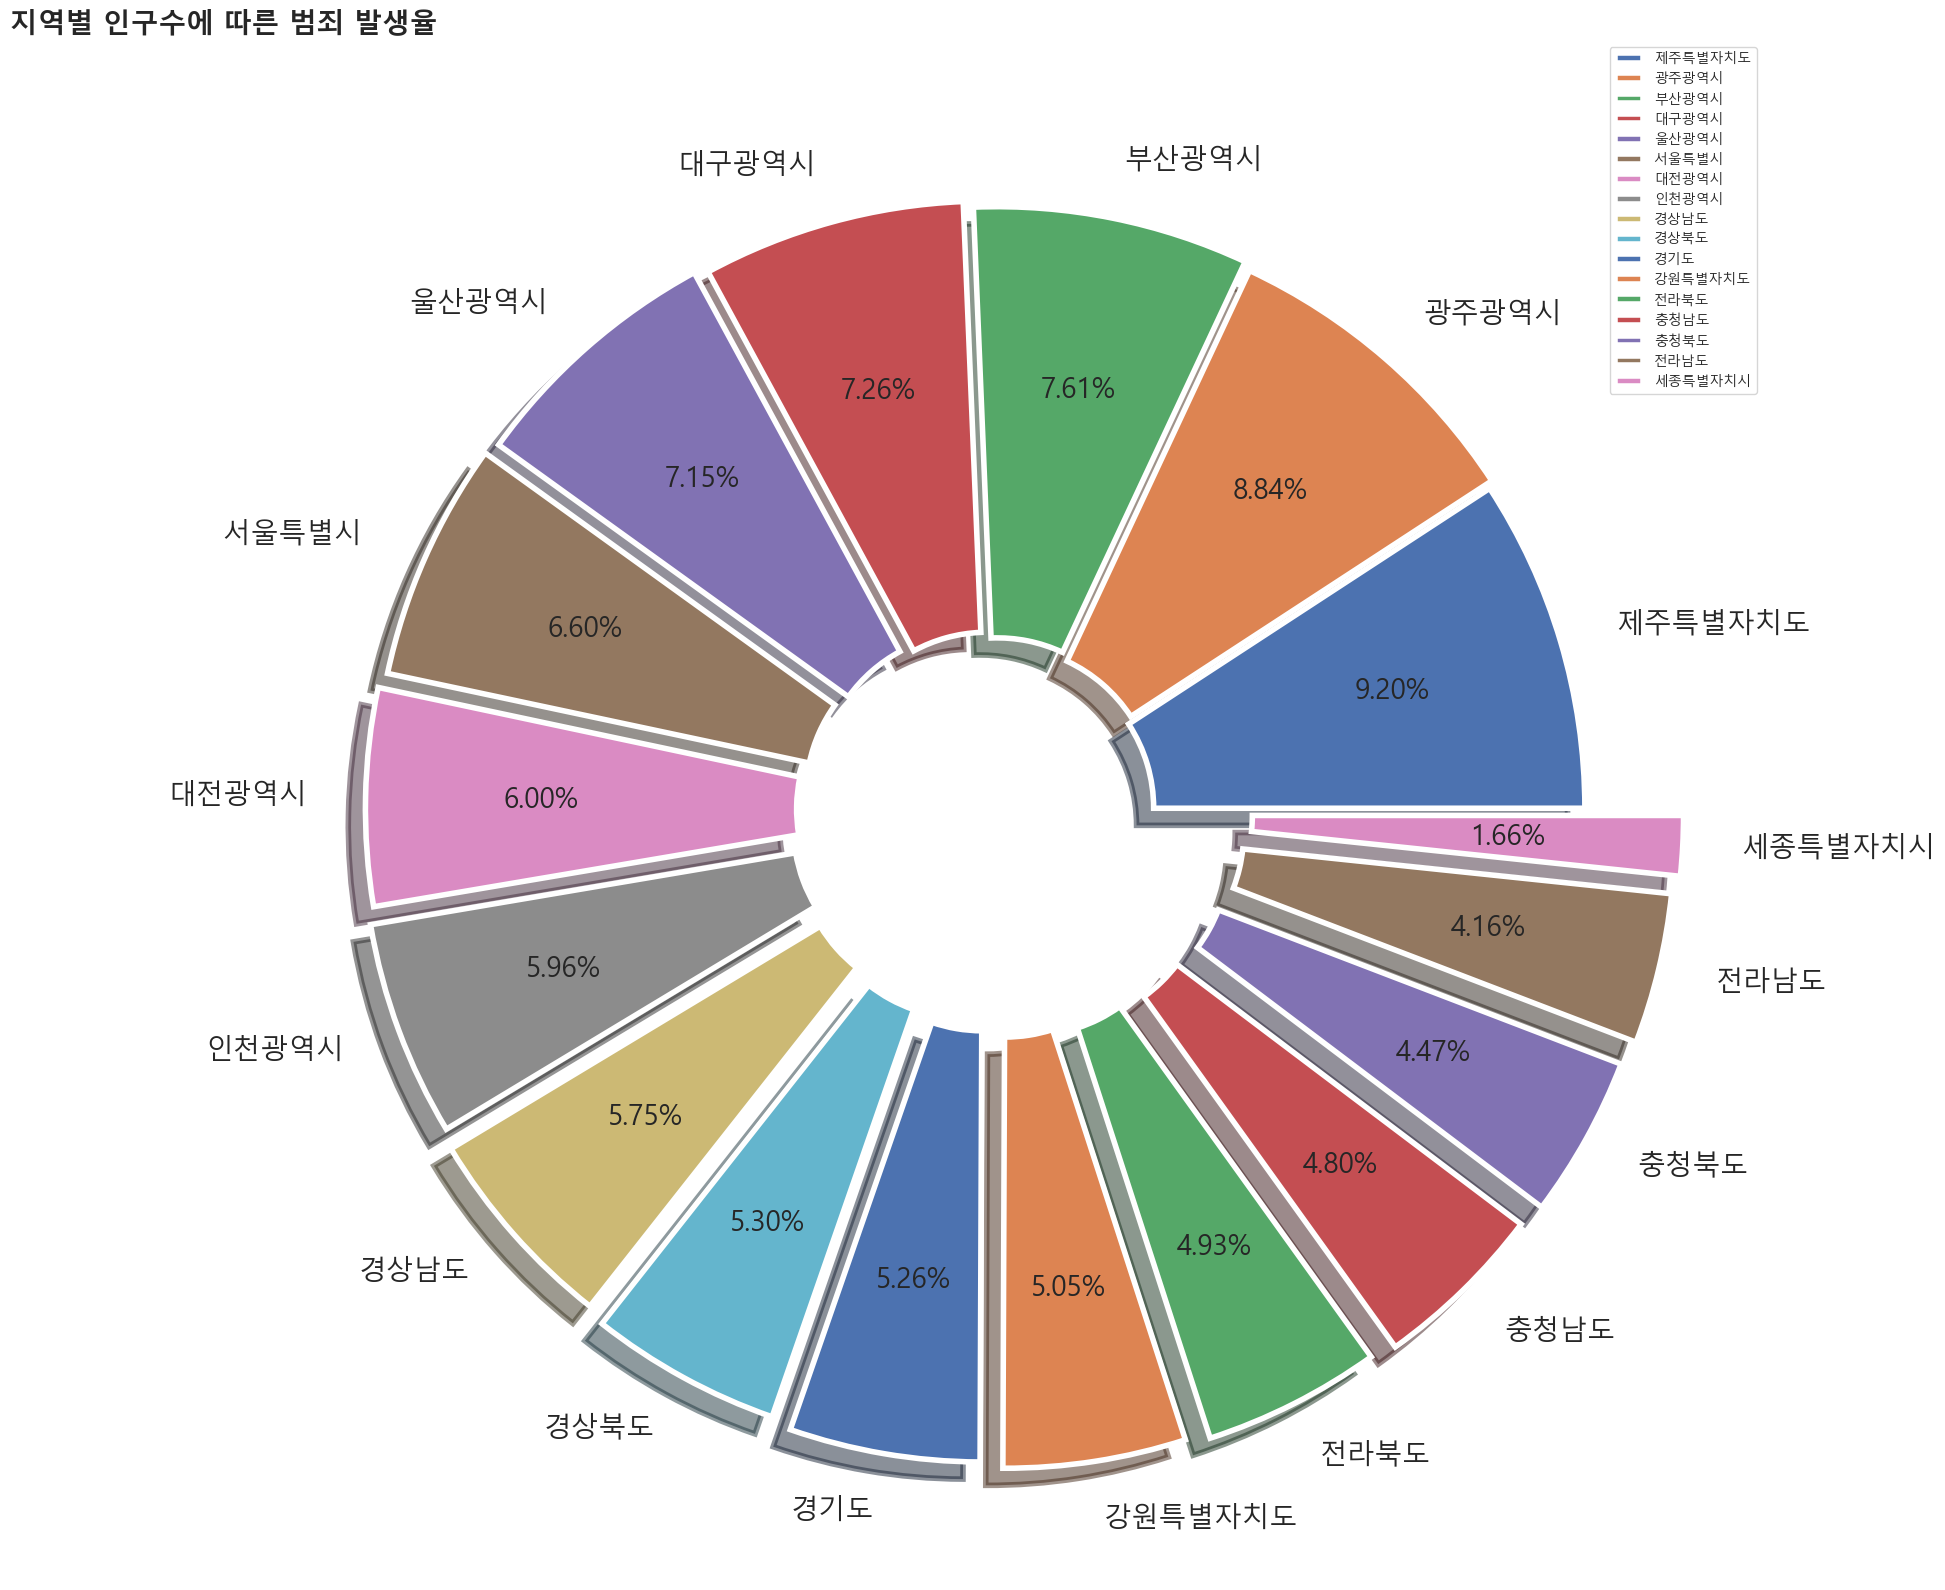

In [71]:
# explode: 부채꼴이 파이 차트의 중심에서 벗어나는 정도
explode = [0.01, 0.02, 0.03, 0.04, 0.05,
           0.06, 0.07, 0.08, 0.09, 0.10,
           0.11, 0.12, 0.13, 0.14, 0.15,
           0.16, 0.17,]

# wedgeprops: 테두리를 추가한다.
wedgeprops = ({'edgecolor' : 'w', 'width' : 0.7, "linewidth":4})

# startangle: 파이 차트의 각도를 돌린다.
plt.figure(figsize=(20, 20))
plt.pie(national_crime1['범죄발생비율'], labels=national_crime1['지역'], autopct='%1.2f%%', wedgeprops=wedgeprops, 
        pctdistance=0.7, labeldistance=1.10, explode=explode, textprops={'size' : 20}, shadow=True, radius=0.95
#         , startangle=90
       )
plt.title('지역별 인구수에 따른 범죄 발생율', fontsize=20, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.legend(fontsize=10, loc='best')
plt.savefig('data/crime/분석 그래프/8. 지역별 인구수에 따른 범죄 발생율(파이차트).png')
plt.show()


### - 분석 결과
지역별 범죄가 자주 발생되는 곳 1순위는 제주이며 그 다음은 광주, 부산, 대구, 울산, 서울 순으로 서울이 6순위 입니다. 범죄가 많이 일어나는 서울보다 제주가 범죄 발생률이 높게 나왔습니다. 